<a href="https://www.kaggle.com/code/dataranch/heart-attack-feature-importance-28-models?scriptVersionId=106682879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Heart Attack Dataset Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

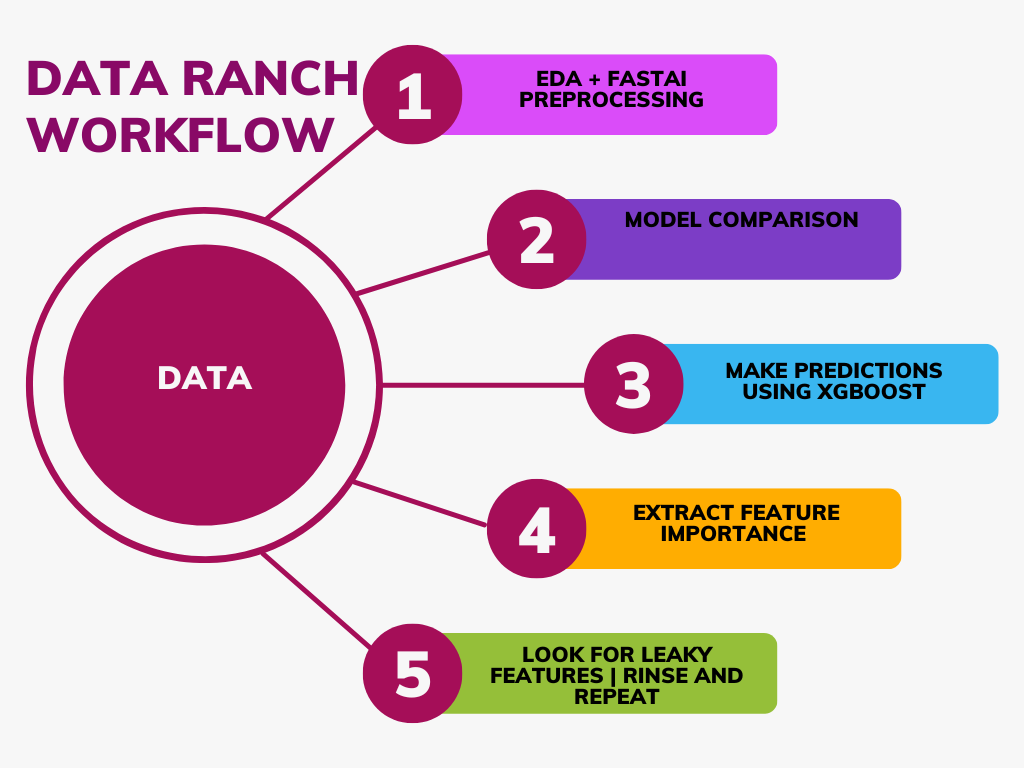

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 837.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 18.6 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x8

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.1 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'heart-attack-analysis-prediction-dataset'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/heart-attack-analysis-prediction-dataset
CSV!
CSV!


In [9]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

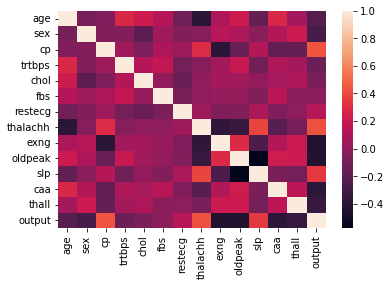

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Target Variable: output
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


  2%|▏         | 1/42 [00:00<00:04,  9.90it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.2767359581115749, 'Adjusted R-Squared': 0.07233525062136792, 'RMSE': 0.4166333760672829, 'Time taken': 0.10091519355773926}
{'Model': 'BaggingRegressor', 'R-Squared': 0.3006944444444445, 'Adjusted R-Squared': 0.10306461352657015, 'RMSE': 0.40967466767342753, 'Time taken': 0.03499865531921387}
{'Model': 'BayesianRidge', 'R-Squared': 0.3383134363433321, 'Adjusted R-Squared': 0.15131505965775205, 'RMSE': 0.39850316846619965, 'Time taken': 0.011741399765014648}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.18055555555555558, 'Adjusted R-Squared': -0.5141908212560387, 'RMSE': 0.5322906474223771, 'Time taken': 0.011444330215454102}


 17%|█▋        | 7/42 [00:00<00:01, 30.63it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.02104819798283386, 'Adjusted R-Squared': -0.309605297412765, 'RMSE': 0.49502683514722723, 'Time taken': 0.011243581771850586}
{'Model': 'ElasticNet', 'R-Squared': -0.021048203110694885, 'Adjusted R-Squared': -0.3096053039898041, 'RMSE': 0.4950269, 'Time taken': 0.013381719589233398}
{'Model': 'ElasticNetCV', 'R-Squared': 0.32153961225291516, 'Adjusted R-Squared': 0.12980080702004337, 'RMSE': 0.4035226, 'Time taken': 0.06341409683227539}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.38888888888888906, 'Adjusted R-Squared': -0.781400966183575, 'RMSE': 0.5773502691896257, 'Time taken': 0.013288497924804688}


 31%|███       | 13/42 [00:00<00:01, 20.22it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.24768055555555546, 'Adjusted R-Squared': 0.03506853864734294, 'RMSE': 0.42491960023828823, 'Time taken': 0.14517974853515625}
{'Model': 'GammaRegressor', 'R-Squared': 0.3239643993999831, 'Adjusted R-Squared': 0.13291086009997843, 'RMSE': 0.4028008740606257, 'Time taken': 0.017167091369628906}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.815395248940544, 'Adjusted R-Squared': -6.45887651494548, 'RMSE': 1.1813953020668952, 'Time taken': 0.03305411338806152}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3344791850574784, 'Adjusted R-Squared': 0.14639721561720065, 'RMSE': 0.3996560966458602, 'Time taken': 0.023932933807373047}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.23587162652349403, 'Adjusted R-Squared': 0.01992230358448155, 'RMSE': 0.42824153188867775, 'Time taken': 0.12278270721435547}


 38%|███▊      | 16/42 [00:01<00:02, 11.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.25109428999735306, 'Adjusted R-Squared': 0.03944702412703982, 'RMSE': 0.42395444377979485, 'Time taken': 0.44563984870910645}
{'Model': 'HuberRegressor', 'R-Squared': 0.31041732807760347, 'Adjusted R-Squared': 0.11553526862127406, 'RMSE': 0.40681671703775296, 'Time taken': 0.02478957176208496}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.31666666666666665, 'Adjusted R-Squared': 0.12355072463768124, 'RMSE': 0.4049691346263318, 'Time taken': 0.019175052642822266}
{'Model': 'KernelRidge', 'R-Squared': -9.5076115205884, 'Adjusted R-Squared': -12.477153906841643, 'RMSE': 1.5880262, 'Time taken': 0.08771777153015137}


 50%|█████     | 21/42 [00:01<00:01, 13.48it/s]

{'Model': 'Lars', 'R-Squared': 0.3313673602148264, 'Adjusted R-Squared': 0.1424059620146687, 'RMSE': 0.4005893577573444, 'Time taken': 0.08198261260986328}
{'Model': 'LarsCV', 'R-Squared': 0.3208898665479055, 'Adjusted R-Squared': 0.12896743752883544, 'RMSE': 0.4037157812477767, 'Time taken': 0.0450441837310791}
{'Model': 'Lasso', 'R-Squared': -0.021048203110694885, 'Adjusted R-Squared': -0.3096053039898041, 'RMSE': 0.4950269, 'Time taken': 0.012852668762207031}
{'Model': 'LassoCV', 'R-Squared': 0.3195474337941656, 'Adjusted R-Squared': 0.1272456216055603, 'RMSE': 0.4041146, 'Time taken': 0.0693356990814209}
{'Model': 'LassoLars', 'R-Squared': -0.021048175809037728, 'Adjusted R-Squared': -0.3096052689724613, 'RMSE': 0.4950268297720529, 'Time taken': 0.022518157958984375}


 57%|█████▋    | 24/42 [00:01<00:01, 16.35it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.3208898665479055, 'Adjusted R-Squared': 0.12896743752883544, 'RMSE': 0.4037157812477767, 'Time taken': 0.052970170974731445}
{'Model': 'LassoLarsIC', 'R-Squared': 0.30696544199848097, 'Adjusted R-Squared': 0.11110784951979091, 'RMSE': 0.40783365962162144, 'Time taken': 0.019561767578125}
{'Model': 'LinearRegression', 'R-Squared': 0.3313671100238732, 'Adjusted R-Squared': 0.1424056411175766, 'RMSE': 0.40058944, 'Time taken': 0.01738595962524414}
{'Model': 'LinearSVR', 'R-Squared': 0.25937248474405306, 'Adjusted R-Squared': 0.05006470869345936, 'RMSE': 0.42160479558637287, 'Time taken': 0.02281665802001953}


 69%|██████▉   | 29/42 [00:02<00:01,  6.51it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.17114365333395964, 'Adjusted R-Squared': -0.0630983576803561, 'RMSE': 0.4460106761052359, 'Time taken': 1.2888920307159424}
{'Model': 'NuSVR', 'R-Squared': 0.28732937015836024, 'Adjusted R-Squared': 0.0859224530292012, 'RMSE': 0.4135709747576509, 'Time taken': 0.08843755722045898}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.03373517400276249, 'Adjusted R-Squared': -0.23933966812689156, 'RMSE': 0.48156365959168573, 'Time taken': 0.012093067169189453}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.2627830577294129, 'Adjusted R-Squared': 0.05443913926163835, 'RMSE': 0.42063293516430794, 'Time taken': 0.024445772171020508}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.07712063502272737, 'Adjusted R-Squared': -0.38152429274654165, 'RMSE': 0.5084377566678684, 'Time taken': 0.015018701553344727}
{'Model': 'PoissonRegressor', 'R-Squared': 0.33264300650856315, 'Adjusted R-Squared': 0.14404211704359193, 'RMSE': 0.4002070444631

 79%|███████▊  | 33/42 [00:03<00:00,  9.24it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.2976458333333333, 'Adjusted R-Squared': 0.09915443840579707, 'RMSE': 0.41056668155124326, 'Time taken': 0.19713759422302246}


 93%|█████████▎| 39/42 [00:03<00:00, 13.04it/s]

{'Model': 'Ridge', 'R-Squared': 0.3317122096550519, 'Adjusted R-Squared': 0.1428482689053927, 'RMSE': 0.40048602, 'Time taken': 0.01734137535095215}
{'Model': 'RidgeCV', 'R-Squared': 0.3345384462884121, 'Adjusted R-Squared': 0.14647322458731127, 'RMSE': 0.3996383025821988, 'Time taken': 0.025271892547607422}
{'Model': 'SGDRegressor', 'R-Squared': 0.33258818603104645, 'Adjusted R-Squared': 0.14397180382242925, 'RMSE': 0.4002234817605644, 'Time taken': 0.014029264450073242}
{'Model': 'SVR', 'R-Squared': 0.28991789503458165, 'Adjusted R-Squared': 0.08924251754435475, 'RMSE': 0.41281921611245326, 'Time taken': 0.03507375717163086}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3313671100238732, 'Adjusted R-Squared': 0.1424056411175766, 'RMSE': 0.40058944, 'Time taken': 0.030861616134643555}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3344791850574784, 'Adjusted R-Squared': 0.14639721561720065, 'RMSE': 0.3996560966458602, 'Time taken': 0.02633047103881836}


100%|██████████| 42/42 [00:03<00:00, 11.46it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.17485864565447973, 'Adjusted R-Squared': -0.05833347622577589, 'RMSE': 0.44501004, 'Time taken': 0.09049725532531738}
{'Model': 'LGBMRegressor', 'R-Squared': 0.2964657883067212, 'Adjusted R-Squared': 0.0976409023934034, 'RMSE': 0.4109114391281738, 'Time taken': 0.08731985092163086}
Project: heart-attack-analysis-prediction-dataset
heart-attack-analysis-prediction-dataset
Target: output
output
Target Standard Deviation: 0.49916260729062806
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                0.15       0.34  0.40        0.01
RidgeCV                                      0.15       0.33  0.40        0.03
TweedieRegressor                             0.15       0.33  0.40        0.03
GeneralizedLinearRegressor                   0.15       0.33  0.40        0.02
PoissonRegressor                          

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,16.040501,5.191940,2.278583,00:00
1,10.329221,1.160348,1.077194,00:00
2,10.344898,1.882543,1.372058,00:00


Better model found at epoch 0 with _rmse value: 2.27858304977417.
Better model found at epoch 1 with _rmse value: 1.077194333076477.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.86
1       2       1.32
2       2       1.95
3       1       0.92
4       1       1.54
XGBoost RMSE:  0.44423285


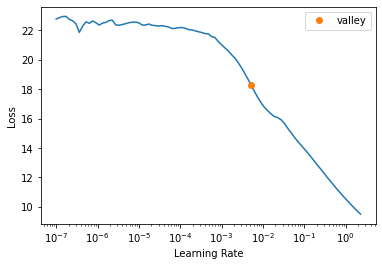

<Figure size 720x720 with 0 Axes>

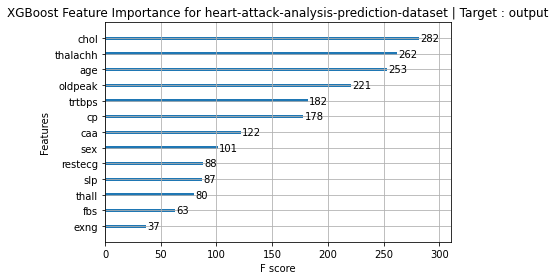

Target Variable: thall
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


  7%|▋         | 3/42 [00:00<00:01, 29.53it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.055328932964847866, 'Adjusted R-Squared': -0.35357406619404386, 'RMSE': 0.624642744511749, 'Time taken': 0.052161455154418945}
{'Model': 'BaggingRegressor', 'R-Squared': -0.12742299023290804, 'Adjusted R-Squared': -0.44604253095090374, 'RMSE': 0.6456263109054132, 'Time taken': 0.035378456115722656}
{'Model': 'BayesianRidge', 'R-Squared': 0.1312782379733749, 'Adjusted R-Squared': -0.11423008607762775, 'RMSE': 0.566732512168914, 'Time taken': 0.013461589813232422}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.8482344102178818, 'Adjusted R-Squared': -1.370561526149022, 'RMSE': 0.8266397845091497, 'Time taken': 0.014072418212890625}
{'Model': 'DummyRegressor', 'R-Squared': -0.004109832053098117, 'Adjusted R-Squared': -0.2878800019811476, 'RMSE': 0.609296084397277, 'Time taken': 0.010478496551513672}


 17%|█▋        | 7/42 [00:00<00:01, 33.91it/s]

{'Model': 'ElasticNet', 'R-Squared': -0.004109824178453847, 'Adjusted R-Squared': -0.2878799918810604, 'RMSE': 0.6092961, 'Time taken': 0.01439523696899414}
{'Model': 'ElasticNetCV', 'R-Squared': 0.10627538015034543, 'Adjusted R-Squared': -0.14629896893760042, 'RMSE': 0.5748303, 'Time taken': 0.06833386421203613}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.8482344102178818, 'Adjusted R-Squared': -1.370561526149022, 'RMSE': 0.8266397845091497, 'Time taken': 0.01614093780517578}


 26%|██▌       | 11/42 [00:00<00:01, 21.88it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.14643275732531946, 'Adjusted R-Squared': -0.47042462352595305, 'RMSE': 0.6510465933146925, 'Time taken': 0.18726491928100586}
{'Model': 'GammaRegressor', 'R-Squared': 0.12266420547346557, 'Adjusted R-Squared': -0.1252785190666419, 'RMSE': 0.5695353716736558, 'Time taken': 0.016482830047607422}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -12.305297014534142, 'Adjusted R-Squared': -16.065489649076397, 'RMSE': 2.217941383251654, 'Time taken': 0.030440330505371094}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.12128035620532018, 'Adjusted R-Squared': -0.12705345617143715, 'RMSE': 0.5699843676927363, 'Time taken': 0.02669811248779297}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.17131951467361417, 'Adjusted R-Squared': -0.5023445949074616, 'RMSE': 0.6580751126561339, 'Time taken': 0.11528444290161133}


 40%|████      | 17/42 [00:00<00:01, 17.35it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.23262355832952486, 'Adjusted R-Squared': -0.580973694379173, 'RMSE': 0.6750765298461018, 'Time taken': 0.16514229774475098}
{'Model': 'HuberRegressor', 'R-Squared': -0.17205107559341437, 'Adjusted R-Squared': -0.5032829013045965, 'RMSE': 0.6582805847253456, 'Time taken': 0.058587074279785156}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.07287753568745337, 'Adjusted R-Squared': -0.3760820566426031, 'RMSE': 0.6298147875897061, 'Time taken': 0.014862775802612305}
{'Model': 'KernelRidge', 'R-Squared': -29.252502089958288, 'Adjusted R-Squared': -37.802122245816065, 'RMSE': 3.3444016, 'Time taken': 0.04579758644104004}
{'Model': 'Lars', 'R-Squared': 0.14729501885179763, 'Adjusted R-Squared': -0.0936868236466073, 'RMSE': 0.5614837313138034, 'Time taken': 0.034778594970703125}


 55%|█████▍    | 23/42 [00:01<00:00, 20.44it/s]

{'Model': 'LarsCV', 'R-Squared': 0.10274620142656943, 'Adjusted R-Squared': -0.15082552425722606, 'RMSE': 0.5759641206758446, 'Time taken': 0.07120418548583984}
{'Model': 'Lasso', 'R-Squared': -0.004109824178453847, 'Adjusted R-Squared': -0.2878799918810604, 'RMSE': 0.6092961, 'Time taken': 0.013013362884521484}
{'Model': 'LassoCV', 'R-Squared': 0.10823951233920048, 'Adjusted R-Squared': -0.14377975591276448, 'RMSE': 0.57419825, 'Time taken': 0.07120633125305176}
{'Model': 'LassoLars', 'R-Squared': -0.004109826651749859, 'Adjusted R-Squared': -0.2878799950533313, 'RMSE': 0.6092960827585019, 'Time taken': 0.012670278549194336}
{'Model': 'LassoLarsCV', 'R-Squared': 0.10274620142656943, 'Adjusted R-Squared': -0.15082552425722606, 'RMSE': 0.5759641206758446, 'Time taken': 0.03493309020996094}
{'Model': 'LassoLarsIC', 'R-Squared': 0.13632680436952826, 'Adjusted R-Squared': -0.10775475091734421, 'RMSE': 0.5650833329361838, 'Time taken': 0.01676630973815918}
{'Model': 'LinearRegression', 'R-S

 69%|██████▉   | 29/42 [00:02<00:01,  6.78it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.2984616676685734, 'Adjusted R-Squared': -0.6654182259227353, 'RMSE': 0.6928709354856771, 'Time taken': 1.4595491886138916}
{'Model': 'NuSVR', 'R-Squared': 0.01698860806415914, 'Adjusted R-Squared': -0.26081895922205667, 'RMSE': 0.6028608100517721, 'Time taken': 0.07264924049377441}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.11898494770963897, 'Adjusted R-Squared': -0.12999756706807175, 'RMSE': 0.5707283442619785, 'Time taken': 0.02489638328552246}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.11898494770963897, 'Adjusted R-Squared': -0.12999756706807175, 'RMSE': 0.5707283442619785, 'Time taken': 0.04102134704589844}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.4174380814796965, 'Adjusted R-Squared': -0.8180184088543934, 'RMSE': 0.7239187505149155, 'Time taken': 0.013593196868896484}
{'Model': 'PoissonRegressor', 'R-Squared': 0.13809778617394974, 'Adjusted R-Squared': -0.10548327425515125, 'RMSE': 0.56450367743179

 79%|███████▊  | 33/42 [00:02<00:00,  9.26it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████| 42/42 [00:03<00:00, 12.40it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.09631855747558271, 'Adjusted R-Squared': -0.40614771502302993, 'RMSE': 0.6366579406033772, 'Time taken': 0.25366711616516113}
{'Model': 'Ridge', 'R-Squared': 0.1472428220473102, 'Adjusted R-Squared': -0.09375377172192811, 'RMSE': 0.5615009, 'Time taken': 0.013478279113769531}
{'Model': 'RidgeCV', 'R-Squared': 0.14664447385877666, 'Adjusted R-Squared': -0.0945212183115689, 'RMSE': 0.5616978738348105, 'Time taken': 0.014708280563354492}
{'Model': 'SGDRegressor', 'R-Squared': 0.1505433764697217, 'Adjusted R-Squared': -0.08952045191926983, 'RMSE': 0.5604132319396108, 'Time taken': 0.011618614196777344}
{'Model': 'SVR', 'R-Squared': 0.025544468631143125, 'Adjusted R-Squared': -0.24984513806005548, 'RMSE': 0.6002315090983061, 'Time taken': 0.018540620803833008}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.14729493849527986, 'Adjusted R-Squared': -0.09368692671257572, 'RMSE': 0.56148374, 'Time taken': 0.01211094856262207}
{'Model': 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,15.782429,9.642203,3.105190,00:00
1,11.037055,2.209747,1.486522,00:00
2,10.094523,3.925337,1.981246,00:00


Better model found at epoch 0 with _rmse value: 3.105189800262451.
Better model found at epoch 1 with _rmse value: 1.48652184009552.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       3.79
1       3       3.01
2       4       2.90
3       3       3.13
4       3       2.80
XGBoost RMSE:  0.75495887


<Figure size 432x288 with 0 Axes>

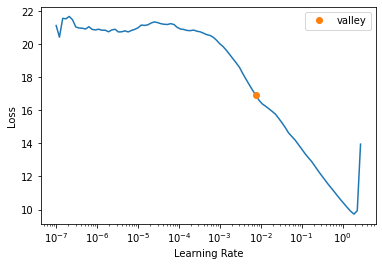

<Figure size 720x720 with 0 Axes>

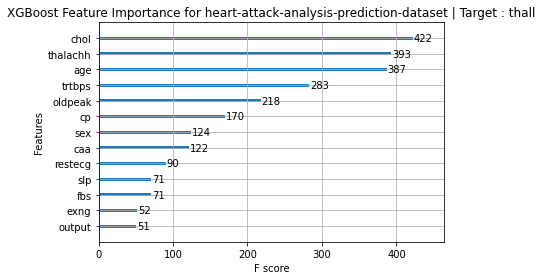

Target Variable: caa
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


  5%|▍         | 2/42 [00:00<00:02, 15.67it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.028434083748066552, 'Adjusted R-Squared': -0.3190784987203461, 'RMSE': 1.060791352387928, 'Time taken': 0.09247660636901855}
{'Model': 'BaggingRegressor', 'R-Squared': -0.20868240670220883, 'Adjusted R-Squared': -0.5502665651180503, 'RMSE': 1.15, 'Time taken': 0.03499102592468262}
{'Model': 'BayesianRidge', 'R-Squared': 0.1756663863454131, 'Adjusted R-Squared': -0.0572974609917527, 'RMSE': 0.9497148847278993, 'Time taken': 0.012548208236694336}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.3000761614623002, 'Adjusted R-Squared': -1.9500976853538194, 'RMSE': 1.5864005379054391, 'Time taken': 0.011552572250366211}
{'Model': 'DummyRegressor', 'R-Squared': -0.024596131230761653, 'Adjusted R-Squared': -0.3141559074481508, 'RMSE': 1.0588101499269473, 'Time taken': 0.010150909423828125}
{'Model': 'ElasticNet', 'R-Squared': -0.024596179067317037, 'Adjusted R-Squared': -0.31415596880373253, 'RMSE': 1.0588101, 'Time taken': 0.011355400085449219

 17%|█▋        | 7/42 [00:00<00:01, 31.70it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.17223679439447703, 'Adjusted R-Squared': -0.06169628545056205, 'RMSE': 0.95168847, 'Time taken': 0.06556153297424316}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.010662604722011, 'Adjusted R-Squared': -1.5788933408391008, 'RMSE': 1.4832396974191326, 'Time taken': 0.012589454650878906}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.009827875095201888, 'Adjusted R-Squared': -0.27000337759528437, 'RMSE': 1.0408714297805148, 'Time taken': 0.1460247039794922}
{'Model': 'GammaRegressor', 'R-Squared': 0.12004444429364824, 'Adjusted R-Squared': -0.12863864753640764, 'RMSE': 0.9812329168969176, 'Time taken': 0.015612363815307617}


 26%|██▌       | 11/42 [00:00<00:01, 24.06it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.907019319109517, 'Adjusted R-Squared': -2.728568257118728, 'RMSE': 1.783469550714467, 'Time taken': 0.03529047966003418}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1391516166693859, 'Adjusted R-Squared': -0.10413162209796156, 'RMSE': 0.970521306357695, 'Time taken': 0.05437803268432617}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.03265238042583429, 'Adjusted R-Squared': -0.3244889227200918, 'RMSE': 1.0629646338970709, 'Time taken': 0.12383389472961426}


 33%|███▎      | 14/42 [00:00<00:01, 15.07it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.05291401839809318, 'Adjusted R-Squared': -0.35047667577146724, 'RMSE': 1.0733421736786675, 'Time taken': 0.16492128372192383}
{'Model': 'HuberRegressor', 'R-Squared': 0.16918347877731754, 'Adjusted R-Squared': -0.06561249461170138, 'RMSE': 0.9534420504875051, 'Time taken': 0.02213883399963379}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.01873571972581889, 'Adjusted R-Squared': -0.3066392926918111, 'RMSE': 1.0557777543908882, 'Time taken': 0.014373779296875}


 40%|████      | 17/42 [00:00<00:01, 17.55it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.373094130937303, 'Adjusted R-Squared': -3.3263598635934972, 'RMSE': 1.9211265, 'Time taken': 0.07120132446289062}


 48%|████▊     | 20/42 [00:01<00:01, 17.67it/s]

{'Model': 'Lars', 'R-Squared': 0.18091807330646492, 'Adjusted R-Squared': -0.05056160162866452, 'RMSE': 0.9466848163233507, 'Time taken': 0.10352301597595215}
{'Model': 'LarsCV', 'R-Squared': 0.17268491805973984, 'Adjusted R-Squared': -0.061121518140768494, 'RMSE': 0.9514308096176172, 'Time taken': 0.04348564147949219}
{'Model': 'Lasso', 'R-Squared': -0.024596179067317037, 'Adjusted R-Squared': -0.31415596880373253, 'RMSE': 1.0588101, 'Time taken': 0.01366114616394043}


 55%|█████▍    | 23/42 [00:01<00:00, 19.23it/s]

{'Model': 'LassoCV', 'R-Squared': 0.17466990508990998, 'Adjusted R-Squared': -0.05857555651511537, 'RMSE': 0.9502888, 'Time taken': 0.07535219192504883}
{'Model': 'LassoLars', 'R-Squared': -0.02459613566212826, 'Adjusted R-Squared': -0.3141559131318601, 'RMSE': 1.0588101522166182, 'Time taken': 0.012500762939453125}
{'Model': 'LassoLarsCV', 'R-Squared': 0.17268491805973984, 'Adjusted R-Squared': -0.061121518140768494, 'RMSE': 0.9514308096176172, 'Time taken': 0.03378033638000488}
{'Model': 'LassoLarsIC', 'R-Squared': 0.17568573784511043, 'Adjusted R-Squared': -0.05727264058996706, 'RMSE': 0.9497037372295679, 'Time taken': 0.01944875717163086}
{'Model': 'LinearRegression', 'R-Squared': 0.18091802375512112, 'Adjusted R-Squared': -0.05056166518364891, 'RMSE': 0.9466849, 'Time taken': 0.012685298919677734}
{'Model': 'LinearSVR', 'R-Squared': 0.08606804658883316, 'Adjusted R-Squared': -0.17221707067954006, 'RMSE': 0.9999969395073425, 'Time taken': 0.013653278350830078}


 79%|███████▊  | 33/42 [00:02<00:00, 12.89it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.040156769068912634, 'Adjusted R-Squared': -0.23110327445509027, 'RMSE': 1.0248065517503444, 'Time taken': 0.8570361137390137}
{'Model': 'NuSVR', 'R-Squared': 0.05222377838188086, 'Adjusted R-Squared': -0.21562602337976133, 'RMSE': 1.0183443175831175, 'Time taken': 0.02211928367614746}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.1554948215020634, 'Adjusted R-Squared': -0.08316968546474479, 'RMSE': 0.9612644881299972, 'Time taken': 0.01326441764831543}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.17309383005139134, 'Adjusted R-Squared': -0.06059704406451982, 'RMSE': 0.9511956515979082, 'Time taken': 0.018908262252807617}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.7818483034229589, 'Adjusted R-Squared': -1.2854141283033602, 'RMSE': 1.3962947463418867, 'Time taken': 0.012392282485961914}
{'Model': 'PoissonRegressor', 'R-Squared': 0.15310026978267754, 'Adjusted R-Squared': -0.0862409583222179, 'RMSE': 0.9626263318717

 98%|█████████▊| 41/42 [00:02<00:00, 16.06it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.061031226199543376, 'Adjusted R-Squared': -0.36088787708202297, 'RMSE': 1.0774715773513472, 'Time taken': 0.22644376754760742}
{'Model': 'Ridge', 'R-Squared': 0.18114720883689162, 'Adjusted R-Squared': -0.050267710404856336, 'RMSE': 0.94655246, 'Time taken': 0.013373613357543945}
{'Model': 'RidgeCV', 'R-Squared': 0.18228495748296525, 'Adjusted R-Squared': -0.04880842409793584, 'RMSE': 0.945894572536525, 'Time taken': 0.012929916381835938}
{'Model': 'SGDRegressor', 'R-Squared': 0.17866939983336128, 'Adjusted R-Squared': -0.05344576977894966, 'RMSE': 0.9479834202219276, 'Time taken': 0.013236761093139648}
{'Model': 'SVR', 'R-Squared': 0.008268741145782021, 'Adjusted R-Squared': -0.272003136356497, 'RMSE': 1.0416905902088474, 'Time taken': 0.0215914249420166}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.18091802375512112, 'Adjusted R-Squared': -0.05056166518364891, 'RMSE': 0.9466849, 'Time taken': 0.01501607894897461}
{'Model': 

100%|██████████| 42/42 [00:02<00:00, 15.25it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.13601101346140898, 'Adjusted R-Squared': -0.45705760422224184, 'RMSE': 1.1148925436541819, 'Time taken': 0.049645185470581055}
Project: heart-attack-analysis-prediction-dataset
heart-attack-analysis-prediction-dataset
Target: caa
caa
Target Standard Deviation: 0.9919765547352707
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RidgeCV                                     -0.05       0.18  0.95        0.01
Ridge                                       -0.05       0.18  0.95        0.01
Lars                                        -0.05       0.18  0.95        0.10
LinearRegression                            -0.05       0.18  0.95        0.01
TransformedTargetRegressor                  -0.05       0.18  0.95        0.02
SGDRegressor                                -0.05       0.18  0.95        0.01
LassoLarsIC                                 -

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,49.898323,5.500998,2.345421,00:00
1,30.728378,3.614012,1.901055,00:00
2,28.250923,33.116768,5.754717,00:00


Better model found at epoch 0 with _rmse value: 2.3454205989837646.
Better model found at epoch 1 with _rmse value: 1.9010554552078247.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.12
1       2       2.69
2       4       2.76
3       2       0.87
4       2       0.95
XGBoost RMSE:  1.1053319


<Figure size 432x288 with 0 Axes>

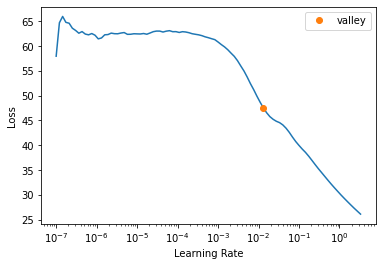

<Figure size 720x720 with 0 Axes>

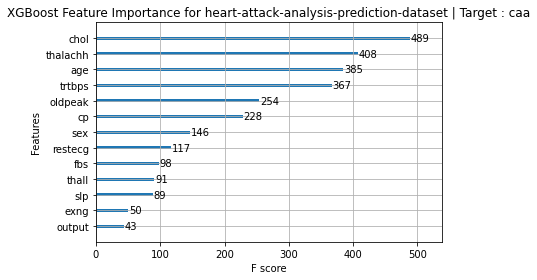

Target Variable: slp
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 10%|▉         | 4/42 [00:00<00:00, 39.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.22323419080196127, 'Adjusted R-Squared': 0.003713418637298238, 'RMSE': 0.5991981462536079, 'Time taken': 0.0414423942565918}
{'Model': 'BaggingRegressor', 'R-Squared': 0.19519230769230755, 'Adjusted R-Squared': -0.03225334448160555, 'RMSE': 0.6099180272790763, 'Time taken': 0.03562331199645996}
{'Model': 'BayesianRidge', 'R-Squared': 0.28665281642426277, 'Adjusted R-Squared': 0.0850546993267719, 'RMSE': 0.5742167886855458, 'Time taken': 0.011801481246948242}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.37019230769230793, 'Adjusted R-Squared': -0.7574205685618731, 'RMSE': 0.7958224257542215, 'Time taken': 0.012069940567016602}
{'Model': 'DummyRegressor', 'R-Squared': -0.057541256639678906, 'Adjusted R-Squared': -0.35641161177697933, 'RMSE': 0.6991559695344621, 'Time taken': 0.012452125549316406}
{'Model': 'ElasticNet', 'R-Squared': -0.05754129516963791, 'Adjusted R-Squared': -0.3564116611958399, 'RMSE': 0.699156, 'Time taken': 0.012176

 19%|█▉        | 8/42 [00:00<00:00, 36.67it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.27998919189961335, 'Adjusted R-Squared': 0.0765078765668954, 'RMSE': 0.57689255, 'Time taken': 0.07520508766174316}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.37019230769230793, 'Adjusted R-Squared': -0.7574205685618731, 'RMSE': 0.7958224257542215, 'Time taken': 0.013193130493164062}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.20247956730769223, 'Adjusted R-Squared': -0.0229066419314381, 'RMSE': 0.6071504481318174, 'Time taken': 0.14639973640441895}
{'Model': 'GammaRegressor', 'R-Squared': 0.21292990040609916, 'Adjusted R-Squared': -0.009502953826959759, 'RMSE': 0.6031594237670158, 'Time taken': 0.014273643493652344}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.967962380064243, 'Adjusted R-Squared': -6.654560443995442, 'RMSE': 1.6608807402856824, 'Time taken': 0.024396657943725586}


 29%|██▊       | 12/42 [00:00<00:01, 25.42it/s]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.19248919030523293, 'Adjusted R-Squared': -0.03572038634763586, 'RMSE': 0.6109414382128463, 'Time taken': 0.02779245376586914}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.18391788843488466, 'Adjusted R-Squared': -0.0467140126596044, 'RMSE': 0.6141752902253811, 'Time taken': 0.12191176414489746}


 45%|████▌     | 19/42 [00:00<00:01, 18.77it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.2520632683635817, 'Adjusted R-Squared': 0.04068984420546362, 'RMSE': 0.5879736203084379, 'Time taken': 0.1759352684020996}
{'Model': 'HuberRegressor', 'R-Squared': 0.2594620733111519, 'Adjusted R-Squared': 0.050179615768651376, 'RMSE': 0.5850581903656733, 'Time taken': 0.02044200897216797}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.10721153846153841, 'Adjusted R-Squared': -0.1450982441471571, 'RMSE': 0.6423913656538875, 'Time taken': 0.015599727630615234}
{'Model': 'KernelRidge', 'R-Squared': -11.194830872691595, 'Adjusted R-Squared': -14.641196119321828, 'RMSE': 2.3741782, 'Time taken': 0.018401622772216797}
{'Model': 'Lars', 'R-Squared': 0.30619332700753277, 'Adjusted R-Squared': 0.11011752811835729, 'RMSE': 0.5662975032464692, 'Time taken': 0.029763460159301758}
{'Model': 'LarsCV', 'R-Squared': 0.28338272945787957, 'Adjusted R-Squared': 0.08086045734814995, 'RMSE': 0.5755314303083736, 'Time taken': 0.09476447105407715}
{

 55%|█████▍    | 23/42 [00:01<00:00, 21.70it/s]

{'Model': 'LassoCV', 'R-Squared': 0.2839616746865571, 'Adjusted R-Squared': 0.081603017532758, 'RMSE': 0.5752989, 'Time taken': 0.07183289527893066}
{'Model': 'LassoLars', 'R-Squared': -0.057541288619562536, 'Adjusted R-Squared': -0.35641165279465614, 'RMSE': 0.6991559801056462, 'Time taken': 0.012802362442016602}
{'Model': 'LassoLarsCV', 'R-Squared': 0.28338272945787957, 'Adjusted R-Squared': 0.08086045734814995, 'RMSE': 0.5755314303083736, 'Time taken': 0.032099008560180664}
{'Model': 'LassoLarsIC', 'R-Squared': 0.27688832310325673, 'Adjusted R-Squared': 0.07253067528461199, 'RMSE': 0.578133450173963, 'Time taken': 0.015946149826049805}
{'Model': 'LinearRegression', 'R-Squared': 0.30619359634756793, 'Adjusted R-Squared': 0.11011787357622849, 'RMSE': 0.56629735, 'Time taken': 0.012516021728515625}
{'Model': 'LinearSVR', 'R-Squared': 0.24868885700055843, 'Adjusted R-Squared': 0.036361794848542406, 'RMSE': 0.5892984864205232, 'Time taken': 0.018055200576782227}


 76%|███████▌  | 32/42 [00:02<00:01,  8.27it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.242257400412615, 'Adjusted R-Squared': 0.028112752703136734, 'RMSE': 0.5918154004871152, 'Time taken': 1.7199304103851318}
{'Model': 'NuSVR', 'R-Squared': 0.1626600521840892, 'Adjusted R-Squared': -0.07397949828562478, 'RMSE': 0.6221230838306113, 'Time taken': 0.028512954711914062}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.25518861008619576, 'Adjusted R-Squared': 0.044698434675772836, 'RMSE': 0.5867438757945247, 'Time taken': 0.016295433044433594}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.29671023049303435, 'Adjusted R-Squared': 0.09795442606715277, 'RMSE': 0.5701545054874724, 'Time taken': 0.02679443359375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.19583463596814787, 'Adjusted R-Squared': -0.03142948864954942, 'RMSE': 0.6096745866418781, 'Time taken': 0.013658523559570312}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2565607065151586, 'Adjusted R-Squared': 0.046458297486833944, 'RMSE': 0.5862031749503599, 

100%|██████████| 42/42 [00:03<00:00, 12.41it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.27871274038461535, 'Adjusted R-Squared': 0.07487068875418057, 'RMSE': 0.5774036716197777, 'Time taken': 0.2044985294342041}
{'Model': 'Ridge', 'R-Squared': 0.3055033796325075, 'Adjusted R-Squared': 0.1092325956156075, 'RMSE': 0.56657904, 'Time taken': 0.011280059814453125}
{'Model': 'RidgeCV', 'R-Squared': 0.29932074942938824, 'Adjusted R-Squared': 0.10130270035508493, 'RMSE': 0.5690953525234145, 'Time taken': 0.014385461807250977}
{'Model': 'SGDRegressor', 'R-Squared': 0.30800192030864915, 'Adjusted R-Squared': 0.1124372456132674, 'RMSE': 0.565558918388214, 'Time taken': 0.012552976608276367}
{'Model': 'SVR', 'R-Squared': 0.15418391209249982, 'Adjusted R-Squared': -0.08485106927266317, 'RMSE': 0.6252639376646563, 'Time taken': 0.018953800201416016}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.30619359634756793, 'Adjusted R-Squared': 0.11011787357622849, 'RMSE': 0.56629735, 'Time taken': 0.012260675430297852}
{'Model': 'Tweedi

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,29.447540,6.773774,2.602648,00:00
1,18.136301,3.718307,1.928291,00:00
2,16.905622,1.320192,1.148996,00:00
3,13.386543,3.199350,1.788673,00:00


Better model found at epoch 0 with _rmse value: 2.602647542953491.
Better model found at epoch 1 with _rmse value: 1.9282912015914917.
Better model found at epoch 2 with _rmse value: 1.1489959955215454.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.81
1       3       2.66
2       3       2.70
3       3       2.64
4       2       1.78
XGBoost RMSE:  0.60341805


<Figure size 432x288 with 0 Axes>

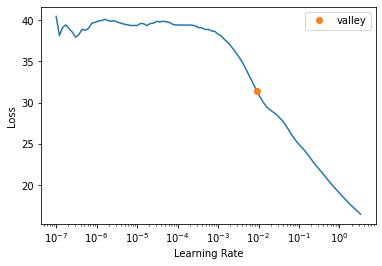

<Figure size 720x720 with 0 Axes>

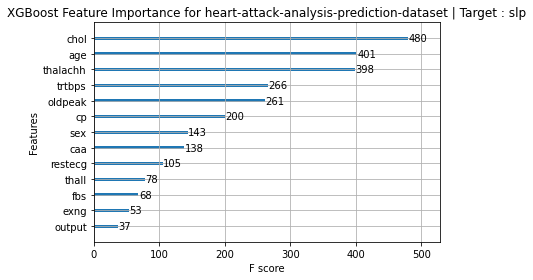

Target Variable: oldpeak
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh']
13
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 17%|█▋        | 7/42 [00:00<00:01, 29.17it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.3570986165326868, 'Adjusted R-Squared': 0.1754090951180114, 'RMSE': 0.9490772605981448, 'Time taken': 0.10345101356506348}
{'Model': 'BaggingRegressor', 'R-Squared': 0.16793630873219623, 'Adjusted R-Squared': -0.0672121257565308, 'RMSE': 1.07971136671256, 'Time taken': 0.039846181869506836}
{'Model': 'BayesianRidge', 'R-Squared': 0.4355945808429149, 'Adjusted R-Squared': 0.2760887015159127, 'RMSE': 0.8892522554593256, 'Time taken': 0.011952400207519531}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.18921300991316548, 'Adjusted R-Squared': -0.5252949474973208, 'RMSE': 1.2908007638822554, 'Time taken': 0.012606382369995117}
{'Model': 'DummyRegressor', 'R-Squared': -0.043117365700973354, 'Adjusted R-Squared': -0.3379114038338571, 'RMSE': 1.2089156, 'Time taken': 0.010601997375488281}
{'Model': 'ElasticNet', 'R-Squared': 0.05425193888466562, 'Adjusted R-Squared': -0.2130246870827115, 'RMSE': 1.1511108, 'Time taken': 0.012037992477416992}
{

 31%|███       | 13/42 [00:00<00:01, 20.06it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.07394594692909007, 'Adjusted R-Squared': -0.1877649811126887, 'RMSE': 1.1390625052004553, 'Time taken': 0.16324877738952637}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.47649222009989334, 'Adjusted R-Squared': -0.8937617605629065, 'RMSE': 1.4382850601795214, 'Time taken': 0.028281688690185547}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.36782125959722445, 'Adjusted R-Squared': 0.18916205035296185, 'RMSE': 0.9411293798788922, 'Time taken': 0.026775836944580078}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.24989808169736127, 'Adjusted R-Squared': 0.03791275695965912, 'RMSE': 1.025154980460418, 'Time taken': 0.1176612377166748}


 45%|████▌     | 19/42 [00:00<00:01, 20.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.33562379389753716, 'Adjusted R-Squared': 0.1478653008685803, 'RMSE': 0.9647980633390146, 'Time taken': 0.1743009090423584}
{'Model': 'HuberRegressor', 'R-Squared': 0.3480193546688055, 'Adjusted R-Squared': 0.16376395490129403, 'RMSE': 0.9557553541618977, 'Time taken': 0.019208669662475586}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.09753515464463758, 'Adjusted R-Squared': -0.15750925817318207, 'RMSE': 1.1244614, 'Time taken': 0.015746593475341797}
{'Model': 'KernelRidge', 'R-Squared': -0.6042212010987587, 'Adjusted R-Squared': -1.0575880622788425, 'RMSE': 1.4992068, 'Time taken': 0.01947760581970215}
{'Model': 'Lars', 'R-Squared': 0.4373562270719784, 'Adjusted R-Squared': 0.27834820428797236, 'RMSE': 0.8878633848578777, 'Time taken': 0.024831533432006836}
{'Model': 'LarsCV', 'R-Squared': 0.4112530535159814, 'Adjusted R-Squared': 0.24486804690093267, 'RMSE': 0.9082255636315428, 'Time taken': 0.0643305778503418}
{'Model': 'La

 52%|█████▏    | 22/42 [00:01<00:00, 21.58it/s]

{'Model': 'LassoCV', 'R-Squared': 0.4179387539410053, 'Adjusted R-Squared': 0.25344318440259384, 'RMSE': 0.903054, 'Time taken': 0.07444024085998535}
{'Model': 'LassoLars', 'R-Squared': -0.04311742378916805, 'Adjusted R-Squared': -0.3379114783382806, 'RMSE': 1.208915616547493, 'Time taken': 0.012847185134887695}
{'Model': 'LassoLarsCV', 'R-Squared': 0.4112530535159814, 'Adjusted R-Squared': 0.24486804690093267, 'RMSE': 0.9082255636315428, 'Time taken': 0.032544851303100586}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4109959561505845, 'Adjusted R-Squared': 0.2445382915844454, 'RMSE': 0.9084238465396459, 'Time taken': 0.015837907791137695}
{'Model': 'LinearRegression', 'R-Squared': 0.4373563371239486, 'Adjusted R-Squared': 0.27834834544158626, 'RMSE': 0.8878633, 'Time taken': 0.012189626693725586}
{'Model': 'LinearSVR', 'R-Squared': 0.3195396666524726, 'Adjusted R-Squared': 0.12723565940208448, 'RMSE': 0.9764067985597135, 'Time taken': 0.016346216201782227}


 69%|██████▉   | 29/42 [00:03<00:02,  5.61it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.2394417753226199, 'Adjusted R-Squared': 0.024501407479012527, 'RMSE': 1.0322755036516675, 'Time taken': 2.0685153007507324}
{'Model': 'NuSVR', 'R-Squared': 0.24174648940892052, 'Adjusted R-Squared': 0.027457453807093746, 'RMSE': 1.0307102684762053, 'Time taken': 0.05114293098449707}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2905660122081285, 'Adjusted R-Squared': 0.0900737982669475, 'RMSE': 0.9969775601261565, 'Time taken': 0.04630756378173828}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4245027179516524, 'Adjusted R-Squared': 0.2618621817205977, 'RMSE': 0.8979476668018729, 'Time taken': 0.0238039493560791}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.923426221086022, 'Adjusted R-Squared': -1.4670031966103325, 'RMSE': 1.6415992840351412, 'Time taken': 0.016355514526367188}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3556486206952333, 'Adjusted R-Squared': 0.17354931784823402, 'RMSE': 0.9501469293232673, 'Time 

 79%|███████▊  | 33/42 [00:03<00:01,  7.76it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.18142196670973076, 'Adjusted R-Squared': -0.04991530356795404, 'RMSE': 1.070926, 'Time taken': 0.08978915214538574}


 83%|████████▎ | 35/42 [00:03<00:00,  7.86it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.24232068638077664, 'Adjusted R-Squared': 0.028193923836213552, 'RMSE': 1.0303199354332315, 'Time taken': 0.22626852989196777}
{'Model': 'Ridge', 'R-Squared': 0.4374544344235244, 'Adjusted R-Squared': 0.27847416589104224, 'RMSE': 0.8877859, 'Time taken': 0.013396501541137695}
{'Model': 'RidgeCV', 'R-Squared': 0.4377532738155845, 'Adjusted R-Squared': 0.27885745989390187, 'RMSE': 0.8875500556282279, 'Time taken': 0.01177358627319336}
{'Model': 'SGDRegressor', 'R-Squared': 0.44015220517261266, 'Adjusted R-Squared': 0.28193435011269885, 'RMSE': 0.8856545820345539, 'Time taken': 0.011378288269042969}
{'Model': 'SVR', 'R-Squared': 0.19100799960775017, 'Adjusted R-Squared': -0.0376201744161464, 'RMSE': 1.064636867779765, 'Time taken': 0.017270565032958984}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4373563371239486, 'Adjusted R-Squared': 0.27834834544158626, 'RMSE': 0.8878633, 'Time taken': 0.011482715606689453}
{'Model': 'TweedieR

100%|██████████| 42/42 [00:04<00:00, 10.36it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.23235153716701895, 'Adjusted R-Squared': 0.015407406366393928, 'RMSE': 1.037076, 'Time taken': 0.22474312782287598}
{'Model': 'LGBMRegressor', 'R-Squared': 0.34838604347224034, 'Adjusted R-Squared': 0.16423427314917782, 'RMSE': 0.9554865470424563, 'Time taken': 0.042760610580444336}
Project: heart-attack-analysis-prediction-dataset
heart-attack-analysis-prediction-dataset
Target: oldpeak
oldpeak
Target Standard Deviation: 1.1482503414154053
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SGDRegressor                                 0.28       0.44  0.89        0.01
RidgeCV                                      0.28       0.44  0.89        0.01
Ridge                                        0.28       0.44  0.89        0.01
LinearRegression                             0.28       0.44  0.89        0.01
TransformedTargetRegressor              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,11.594828,6.177632,2.485484,00:00
1,9.156643,6.690426,2.586586,00:00


Better model found at epoch 0 with _rmse value: 2.4854841232299805.
No improvement since epoch 0: early stopping


,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age,trtbps,chol,thalachh,oldpeak,oldpeak_pred
0,2.00,1.00,2.00,2.00,1.00,2.00,3.00,3.00,1.00,1.49,0.69,-1.06,-0.38,3.40,1.27
1,1.00,3.00,1.00,2.00,1.00,2.00,1.00,2.00,2.00,-0.46,-0.64,-0.55,0.37,1.60,-0.98
2,2.00,3.00,2.00,2.00,1.00,3.00,1.00,2.00,2.00,0.51,1.02,-0.69,0.32,1.60,0.48
3,2.00,1.00,1.00,2.00,1.00,3.00,3.00,3.00,1.00,-0.25,-0.36,-0.69,0.81,1.00,-0.28
4,2.00,1.00,1.00,2.00,2.00,2.00,1.00,1.00,2.00,0.29,-1.19,-0.90,-1.05,1.50,-2.83
5,2.00,1.00,2.00,2.00,2.00,3.00,3.00,3.00,1.00,0.62,-0.81,-0.34,0.45,1.40,-1.12
6,2.00,3.00,1.00,2.00,1.00,3.00,1.00,2.00,2.00,0.29,1.02,-1.54,1.07,1.60,7.16
7,2.00,1.00,1.00,2.00,1.00,2.00,1.00,2.00,2.00,-1.22,-0.92,1.09,1.38,1.20,-1.95
8,2.00,3.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,0.62,0.47,-1.21,0.23,3.00,3.23


<Figure size 432x288 with 0 Axes>

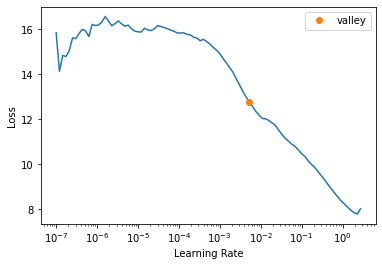

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    1.40       2.11
1    3.50       0.91
2    1.40       0.15
3    1.00       1.91
4    1.90       1.16
XGBoost RMSE:  1.0417581


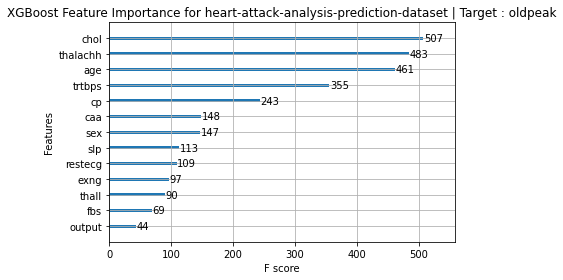

Target Variable: exng
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


  2%|▏         | 1/42 [00:00<00:04,  9.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.01710859919154073, 'Adjusted R-Squared': -0.3045523337456717, 'RMSE': 0.44598344944093465, 'Time taken': 0.10461187362670898}
{'Model': 'BaggingRegressor', 'R-Squared': 0.20397727272727306, 'Adjusted R-Squared': -0.020985671936758488, 'RMSE': 0.3945461527713414, 'Time taken': 0.035721778869628906}
{'Model': 'BayesianRidge', 'R-Squared': 0.2927803472860554, 'Adjusted R-Squared': 0.09291392369298412, 'RMSE': 0.37188806392015666, 'Time taken': 0.011974811553955078}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7045454545454539, 'Adjusted R-Squared': -1.1862648221343863, 'RMSE': 0.5773502691896257, 'Time taken': 0.012343883514404297}
{'Model': 'DummyRegressor', 'R-Squared': -0.029776670123128124, 'Adjusted R-Squared': -0.32080051167966417, 'RMSE': 0.4487522131690032, 'Time taken': 0.011020183563232422}


 17%|█▋        | 7/42 [00:00<00:01, 29.25it/s]

{'Model': 'ElasticNet', 'R-Squared': -0.029776727611367848, 'Adjusted R-Squared': -0.32080058541458034, 'RMSE': 0.44875222, 'Time taken': 0.016478538513183594}
{'Model': 'ElasticNetCV', 'R-Squared': 0.30553827481079787, 'Adjusted R-Squared': 0.10927735247471904, 'RMSE': 0.36851844, 'Time taken': 0.06616020202636719}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.5340909090909085, 'Adjusted R-Squared': -0.9676383399209478, 'RMSE': 0.5477225575051661, 'Time taken': 0.01251673698425293}


 24%|██▍       | 10/42 [00:00<00:01, 23.16it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.3220767045454548, 'Adjusted R-Squared': 0.1304896862648225, 'RMSE': 0.36410392289381704, 'Time taken': 0.14430737495422363}
{'Model': 'GammaRegressor', 'R-Squared': 0.27612275556136734, 'Adjusted R-Squared': 0.07154875169827557, 'RMSE': 0.37624223140182117, 'Time taken': 0.013471841812133789}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.260275567932171, 'Adjusted R-Squared': -5.74687518495648, 'RMSE': 1.014236713525147, 'Time taken': 0.03690052032470703}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2698856598763699, 'Adjusted R-Squared': 0.06354899853708318, 'RMSE': 0.37785965040204333, 'Time taken': 0.05434298515319824}


 36%|███▌      | 15/42 [00:00<00:01, 16.32it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.24789612655180848, 'Adjusted R-Squared': 0.03534503188166749, 'RMSE': 0.3835076150582233, 'Time taken': 0.12531185150146484}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.24722668401344405, 'Adjusted R-Squared': 0.03448639906072182, 'RMSE': 0.38367825585397564, 'Time taken': 0.1478266716003418}
{'Model': 'HuberRegressor', 'R-Squared': 0.2566206954442314, 'Adjusted R-Squared': 0.046535239808905504, 'RMSE': 0.3812767405584898, 'Time taken': 0.01774430274963379}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.32159090909090926, 'Adjusted R-Squared': 0.12986660079051415, 'RMSE': 0.3642343567906063, 'Time taken': 0.013231277465820312}


 43%|████▎     | 18/42 [00:00<00:01, 18.03it/s]

{'Model': 'KernelRidge', 'R-Squared': -8.47641110471026, 'Adjusted R-Squared': -11.154527286476203, 'RMSE': 1.36131, 'Time taken': 0.06263494491577148}
{'Model': 'Lars', 'R-Squared': 0.2756730246083817, 'Adjusted R-Squared': 0.07097192286727227, 'RMSE': 0.3763590892705837, 'Time taken': 0.05380582809448242}
{'Model': 'LarsCV', 'R-Squared': 0.29971955678762907, 'Adjusted R-Squared': 0.10181421414065472, 'RMSE': 0.37005909138553256, 'Time taken': 0.06741881370544434}
{'Model': 'Lasso', 'R-Squared': -0.029776727611367848, 'Adjusted R-Squared': -0.32080058541458034, 'RMSE': 0.44875222, 'Time taken': 0.012828588485717773}


 50%|█████     | 21/42 [00:01<00:01, 18.26it/s]

{'Model': 'LassoCV', 'R-Squared': 0.3038756476115936, 'Adjusted R-Squared': 0.10714485237139182, 'RMSE': 0.36895934, 'Time taken': 0.07177948951721191}
{'Model': 'LassoLars', 'R-Squared': -0.02977671087370215, 'Adjusted R-Squared': -0.32080056394670486, 'RMSE': 0.4487522220480692, 'Time taken': 0.01298379898071289}
{'Model': 'LassoLarsCV', 'R-Squared': 0.29971955678762907, 'Adjusted R-Squared': 0.10181421414065472, 'RMSE': 0.37005909138553256, 'Time taken': 0.03216242790222168}
{'Model': 'LassoLarsIC', 'R-Squared': 0.31135763657869153, 'Adjusted R-Squared': 0.11674131648136532, 'RMSE': 0.3669711704724839, 'Time taken': 0.015985727310180664}
{'Model': 'LinearRegression', 'R-Squared': 0.2756731344207569, 'Adjusted R-Squared': 0.07097206371357956, 'RMSE': 0.37635908, 'Time taken': 0.013358116149902344}
{'Model': 'LinearSVR', 'R-Squared': -0.1920245271647738, 'Adjusted R-Squared': -0.5289010239722098, 'RMSE': 0.4828115767517964, 'Time taken': 0.015258550643920898}


 71%|███████▏  | 30/42 [00:03<00:01,  6.56it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.07510562362822382, 'Adjusted R-Squared': -0.1862775696942347, 'RMSE': 0.4252860609067641, 'Time taken': 1.9285781383514404}
{'Model': 'NuSVR', 'R-Squared': 0.25521874270654954, 'Adjusted R-Squared': 0.04473708303666146, 'RMSE': 0.38163609962552797, 'Time taken': 0.045464277267456055}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.24125353806718242, 'Adjusted R-Squared': 0.026825190129647125, 'RMSE': 0.3851974635029213, 'Time taken': 0.02428579330444336}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.26660556350028664, 'Adjusted R-Squared': 0.05934191840254166, 'RMSE': 0.3787074814035961, 'Time taken': 0.03558516502380371}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.06754220529581412, 'Adjusted R-Squared': -0.3692389154881093, 'RMSE': 0.4569067837487488, 'Time taken': 0.01261591911315918}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2865533681742173, 'Adjusted R-Squared': 0.0849271461364961, 'RMSE': 0.3735216893915678,

 79%|███████▊  | 33/42 [00:03<00:01,  8.29it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████| 42/42 [00:03<00:00, 11.21it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.25352840909090923, 'Adjusted R-Squared': 0.042569046442688, 'RMSE': 0.3820689292086792, 'Time taken': 0.20895910263061523}
{'Model': 'Ridge', 'R-Squared': 0.2763891104158822, 'Adjusted R-Squared': 0.07189038075080545, 'RMSE': 0.37617302, 'Time taken': 0.011951208114624023}
{'Model': 'RidgeCV', 'R-Squared': 0.2818220430791707, 'Adjusted R-Squared': 0.07885870742763201, 'RMSE': 0.3747581744984446, 'Time taken': 0.012410879135131836}
{'Model': 'SGDRegressor', 'R-Squared': 0.28931128972883846, 'Adjusted R-Squared': 0.08846448030437981, 'RMSE': 0.37279904179616435, 'Time taken': 0.01322627067565918}
{'Model': 'SVR', 'R-Squared': 0.2264033790898452, 'Adjusted R-Squared': 0.00777824709349717, 'RMSE': 0.38894873309728867, 'Time taken': 0.02012467384338379}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2756731344207569, 'Adjusted R-Squared': 0.07097206371357956, 'RMSE': 0.37635908, 'Time taken': 0.012487649917602539}
{'Model': 'TweedieR

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,22.370373,6.458317,2.541322,00:00
1,13.367936,6.895708,2.625968,00:00


Better model found at epoch 0 with _rmse value: 2.5413219928741455.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       0.86
1       1       0.83
2       1       1.16
3       1       1.08
4       2       1.14
XGBoost RMSE:  0.39838973


<Figure size 432x288 with 0 Axes>

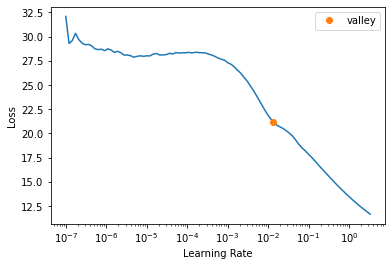

<Figure size 720x720 with 0 Axes>

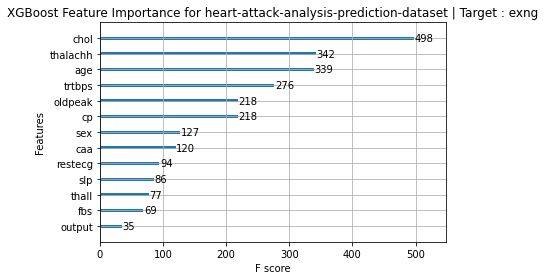

Target Variable: thalachh
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'oldpeak']
13
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 17%|█▋        | 7/42 [00:00<00:01, 29.73it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06111542644394663, 'Adjusted R-Squared': -0.20422151825667711, 'RMSE': 19.096691600678252, 'Time taken': 0.09679889678955078}
{'Model': 'BaggingRegressor', 'R-Squared': 0.1259983351637295, 'Adjusted R-Squared': -0.12100213533347737, 'RMSE': 18.425028267730465, 'Time taken': 0.04078531265258789}
{'Model': 'BayesianRidge', 'R-Squared': 0.213818975600092, 'Adjusted R-Squared': -0.008362618252055753, 'RMSE': 17.474844164511385, 'Time taken': 0.014563798904418945}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.586675449450663, 'Adjusted R-Squared': -1.0350837286432415, 'RMSE': 24.825390228554312, 'Time taken': 0.01325368881225586}
{'Model': 'DummyRegressor', 'R-Squared': -0.1490495348267593, 'Adjusted R-Squared': -0.4737809251038869, 'RMSE': 21.126202, 'Time taken': 0.010467290878295898}
{'Model': 'ElasticNet', 'R-Squared': 0.2005286063393239, 'Adjusted R-Squared': -0.025408961434345345, 'RMSE': 17.621931, 'Time taken': 0.012286186218261719}

 26%|██▌       | 11/42 [00:00<00:01, 22.54it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.22819959877464957, 'Adjusted R-Squared': 0.010082094080528847, 'RMSE': 17.314283843116353, 'Time taken': 0.167464017868042}
{'Model': 'GammaRegressor', 'R-Squared': 0.18216112538785467, 'Adjusted R-Squared': -0.04896725221992537, 'RMSE': 17.82320933569326, 'Time taken': 0.013870716094970703}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -31.189803318937372, 'Adjusted R-Squared': -40.28692164820228, 'RMSE': 111.81786465704015, 'Time taken': 0.029606103897094727}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1936946167766569, 'Adjusted R-Squared': -0.03417429587341836, 'RMSE': 17.69708808527417, 'Time taken': 0.025501489639282227}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.06487018028730662, 'Adjusted R-Squared': -0.3658117529771976, 'RMSE': 20.337631108531337, 'Time taken': 0.11714363098144531}


 43%|████▎     | 18/42 [00:00<00:01, 20.33it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.15770265502388647, 'Adjusted R-Squared': -0.08033789899110211, 'RMSE': 18.087758412055592, 'Time taken': 0.15797638893127441}
{'Model': 'HuberRegressor', 'R-Squared': 0.244385862962321, 'Adjusted R-Squared': 0.030842737277759658, 'RMSE': 17.13176349170654, 'Time taken': 0.02157878875732422}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.020902274450431024, 'Adjusted R-Squared': -0.25579925668314285, 'RMSE': 19.501368, 'Time taken': 0.013541221618652344}
{'Model': 'KernelRidge', 'R-Squared': -60.39490697540486, 'Adjusted R-Squared': -77.74564155541057, 'RMSE': 154.4252, 'Time taken': 0.026135683059692383}
{'Model': 'Lars', 'R-Squared': 0.19536792913844014, 'Adjusted R-Squared': -0.032028090887652905, 'RMSE': 17.67871530955114, 'Time taken': 0.044855356216430664}
{'Model': 'LarsCV', 'R-Squared': 0.18992456647356393, 'Adjusted R-Squared': -0.039009795175211526, 'RMSE': 17.73841306332152, 'Time taken': 0.07747030258178711}


 50%|█████     | 21/42 [00:01<00:01, 19.56it/s]

{'Model': 'Lasso', 'R-Squared': 0.18711679557657013, 'Adjusted R-Squared': -0.04261106654309477, 'RMSE': 17.769127, 'Time taken': 0.013946533203125}
{'Model': 'LassoCV', 'R-Squared': 0.1900575897777882, 'Adjusted R-Squared': -0.03883917832848893, 'RMSE': 17.736958, 'Time taken': 0.07296180725097656}
{'Model': 'LassoLars', 'R-Squared': -0.14904954063428466, 'Adjusted R-Squared': -0.4737809325526694, 'RMSE': 21.126201104424492, 'Time taken': 0.013033390045166016}
{'Model': 'LassoLarsCV', 'R-Squared': 0.18992456647356393, 'Adjusted R-Squared': -0.039009795175211526, 'RMSE': 17.73841306332152, 'Time taken': 0.03209805488586426}
{'Model': 'LassoLarsIC', 'R-Squared': 0.18610273641053932, 'Adjusted R-Squared': -0.04391170764735164, 'RMSE': 17.78020758375351, 'Time taken': 0.015824556350708008}
{'Model': 'LinearRegression', 'R-Squared': 0.19536781021558314, 'Adjusted R-Squared': -0.03202824341914323, 'RMSE': 17.678717, 'Time taken': 0.012030839920043945}
{'Model': 'LinearSVR', 'R-Squared': -0.

 74%|███████▍  | 31/42 [00:02<00:01, 10.03it/s]

{'Model': 'MLPRegressor', 'R-Squared': -25.498924935002663, 'Adjusted R-Squared': -32.98775154706863, 'RMSE': 101.45329586858213, 'Time taken': 1.2808470726013184}
{'Model': 'NuSVR', 'R-Squared': 0.12646905846387568, 'Adjusted R-Squared': -0.12039838153546367, 'RMSE': 18.42006588689533, 'Time taken': 0.03862881660461426}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.22336635556392004, 'Adjusted R-Squared': -0.569100325614593, 'RMSE': 21.798685174103827, 'Time taken': 0.014980316162109375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.041411126430002554, 'Adjusted R-Squared': -0.2294944247963009, 'RMSE': 19.29604151219179, 'Time taken': 0.0239715576171875}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.17060964194191652, 'Adjusted R-Squared': -0.06378328533536792, 'RMSE': 17.94863905327374, 'Time taken': 0.016770601272583008}
{'Model': 'PoissonRegressor', 'R-Squared': 0.1881038018419019, 'Adjusted R-Squared': -0.04134512372451704, 'RMSE': 17.758336730808296, '

100%|██████████| 42/42 [00:03<00:00, 13.78it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.23003964541403632, 'Adjusted R-Squared': 0.012442153900611874, 'RMSE': 17.293632065011675, 'Time taken': 0.2260286808013916}
{'Model': 'Ridge', 'R-Squared': 0.1962820011387162, 'Adjusted R-Squared': -0.030855694191646466, 'RMSE': 17.66867, 'Time taken': 0.014018535614013672}
{'Model': 'RidgeCV', 'R-Squared': 0.2033006653009578, 'Adjusted R-Squared': -0.02185349450529328, 'RMSE': 17.59135367183873, 'Time taken': 0.011723518371582031}
{'Model': 'SGDRegressor', 'R-Squared': 0.19611283587192863, 'Adjusted R-Squared': -0.031072667033830603, 'RMSE': 17.670530175104417, 'Time taken': 0.012041091918945312}
{'Model': 'SVR', 'R-Squared': 0.1925747382384686, 'Adjusted R-Squared': -0.03561066182457284, 'RMSE': 17.70937357462248, 'Time taken': 0.015876293182373047}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.19536781021558314, 'Adjusted R-Squared': -0.03202824341914323, 'RMSE': 17.678717, 'Time taken': 0.012362957000732422}
{'Model': 'Twe

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,22796.679688,24338.064453,156.006622,00:00
1,22013.085938,23305.724609,152.662125,00:00
2,20541.109375,19436.261719,139.414001,00:00
3,18286.773438,11185.758789,105.762749,00:00
4,14928.185547,856.599854,29.267727,00:00
5,12527.598633,2039.433472,45.160088,00:00


Better model found at epoch 0 with _rmse value: 156.00662231445312.
Better model found at epoch 1 with _rmse value: 152.66212463378906.
Better model found at epoch 2 with _rmse value: 139.41400146484375.
Better model found at epoch 3 with _rmse value: 105.76274871826172.
Better model found at epoch 4 with _rmse value: 29.26772689819336.
No improvement since epoch 4: early stopping


,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age,trtbps,chol,oldpeak,thalachh,thalachh_pred
0,1.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,1.00,0.81,0.45,0.39,2.06,160.00,153.35
1,2.00,1.00,1.00,1.00,1.00,2.00,1.00,4.00,1.00,-0.72,-0.43,0.51,-0.51,166.00,189.59
2,2.00,3.00,1.00,1.00,1.00,2.00,1.00,4.00,1.00,1.35,1.11,-0.68,-0.26,150.00,159.00
3,2.00,4.00,1.00,2.00,1.00,3.00,3.00,3.00,1.00,0.48,0.12,-0.83,-0.26,162.00,171.49
4,2.00,3.00,1.00,2.00,1.00,3.00,1.00,3.00,2.00,-1.16,-0.65,-0.41,-0.93,169.00,160.17
5,2.00,3.00,1.00,2.00,1.00,2.00,4.00,4.00,2.00,0.81,-0.10,-0.32,0.56,146.00,167.25
6,2.00,3.00,1.00,2.00,1.00,2.00,2.00,4.00,1.00,-0.50,0.45,-0.28,-0.43,163.00,156.13
7,1.00,1.00,1.00,2.00,2.00,3.00,1.00,3.00,2.00,1.03,2.65,1.48,-0.93,154.00,187.36
8,2.00,4.00,1.00,1.00,2.00,2.00,1.00,3.00,2.00,1.03,-1.20,-0.70,0.56,144.00,165.03


<Figure size 432x288 with 0 Axes>

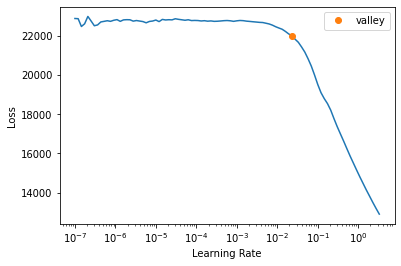

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  121.00     151.99
1  190.00     134.86
2  171.00     160.56
3  174.00     143.24
4  143.00     157.29
XGBoost RMSE:  19.020216


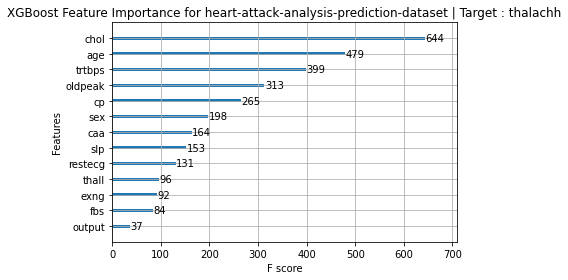

Target Variable: restecg
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


  2%|▏         | 1/42 [00:00<00:04,  9.55it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.004123521336483971, 'Adjusted R-Squared': -0.27731983132929217, 'RMSE': 0.4964669459986437, 'Time taken': 0.10431814193725586}
{'Model': 'BaggingRegressor', 'R-Squared': -0.4161616161616166, 'Adjusted R-Squared': -0.8163812033377256, 'RMSE': 0.5920304046246274, 'Time taken': 0.03826141357421875}
{'Model': 'BayesianRidge', 'R-Squared': -0.006836740424915222, 'Adjusted R-Squared': -0.2913775583710869, 'RMSE': 0.4991914394850602, 'Time taken': 0.013564109802246094}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.2895622895622898, 'Adjusted R-Squared': -1.9366125018298934, 'RMSE': 0.752772652709081, 'Time taken': 0.01227569580078125}
{'Model': 'DummyRegressor', 'R-Squared': -0.03681442524417733, 'Adjusted R-Squared': -0.3298271975957925, 'RMSE': 0.5065684260274557, 'Time taken': 0.010634422302246094}


 17%|█▋        | 7/42 [00:00<00:01, 29.18it/s]

{'Model': 'ElasticNet', 'R-Squared': -0.036814366928254794, 'Adjusted R-Squared': -0.3298271227992833, 'RMSE': 0.50656843, 'Time taken': 0.013890743255615234}
{'Model': 'ElasticNetCV', 'R-Squared': -0.030968607274771465, 'Adjusted R-Squared': -0.32232930063503296, 'RMSE': 0.50513834, 'Time taken': 0.0657203197479248}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.1548821548821548, 'Adjusted R-Squared': -1.7638705899575462, 'RMSE': 0.7302967433402214, 'Time taken': 0.013882160186767578}


 31%|███       | 13/42 [00:00<00:01, 19.87it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.08212794612794627, 'Adjusted R-Squared': -0.387946713511931, 'RMSE': 0.5175197258720354, 'Time taken': 0.15777254104614258}
{'Model': 'GammaRegressor', 'R-Squared': 0.0005613051884147957, 'Adjusted R-Squared': -0.2818887607365983, 'RMSE': 0.49735407605233045, 'Time taken': 0.014485359191894531}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.069444170255487, 'Adjusted R-Squared': -5.502113174892907, 'RMSE': 1.1201283105690316, 'Time taken': 0.03171849250793457}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.0009853299331299414, 'Adjusted R-Squared': -0.2838724883924926, 'RMSE': 0.49773875593372235, 'Time taken': 0.025561094284057617}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.42351715138568613, 'Adjusted R-Squared': -0.825815476777293, 'RMSE': 0.5935659145941227, 'Time taken': 0.11933779716491699}


 45%|████▌     | 19/42 [00:00<00:01, 20.81it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.41862286224103906, 'Adjusted R-Squared': -0.8195380189613326, 'RMSE': 0.5925446467606109, 'Time taken': 0.16637730598449707}
{'Model': 'HuberRegressor', 'R-Squared': -0.04755640958781604, 'Adjusted R-Squared': -0.34360496012350317, 'RMSE': 0.5091858318659156, 'Time taken': 0.019098758697509766}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.04781144781144797, 'Adjusted R-Squared': -0.343932074366857, 'RMSE': 0.509247811319139, 'Time taken': 0.013855934143066406}
{'Model': 'KernelRidge', 'R-Squared': -8.339599569237192, 'Adjusted R-Squared': -10.97905162141292, 'RMSE': 1.5203785, 'Time taken': 0.018356800079345703}
{'Model': 'Lars', 'R-Squared': -0.03164806475503035, 'Adjusted R-Squared': -0.3232007787075388, 'RMSE': 0.5053047555949478, 'Time taken': 0.022707223892211914}
{'Model': 'LarsCV', 'R-Squared': -0.03464533277813331, 'Adjusted R-Squared': -0.32704510073717086, 'RMSE': 0.5060382592873666, 'Time taken': 0.06029534339904

 52%|█████▏    | 22/42 [00:01<00:00, 21.48it/s]

{'Model': 'LassoCV', 'R-Squared': -0.030710641583208353, 'Adjusted R-Squared': -0.3219984315958542, 'RMSE': 0.5050751, 'Time taken': 0.0832524299621582}
{'Model': 'LassoLars', 'R-Squared': -0.036814391807068914, 'Adjusted R-Squared': -0.32982715470906654, 'RMSE': 0.5065684178590781, 'Time taken': 0.012813091278076172}
{'Model': 'LassoLarsCV', 'R-Squared': -0.03464533277813331, 'Adjusted R-Squared': -0.32704510073717086, 'RMSE': 0.5060382592873666, 'Time taken': 0.03341078758239746}
{'Model': 'LassoLarsIC', 'R-Squared': -0.029258524622944426, 'Adjusted R-Squared': -0.32013593375551563, 'RMSE': 0.5047192138646782, 'Time taken': 0.016438961029052734}
{'Model': 'LinearRegression', 'R-Squared': -0.03164813848155923, 'Adjusted R-Squared': -0.32320087326982594, 'RMSE': 0.50530475, 'Time taken': 0.013969659805297852}
{'Model': 'LinearSVR', 'R-Squared': -0.34400995526661426, 'Adjusted R-Squared': -0.7238388556680486, 'RMSE': 0.5767516483968529, 'Time taken': 0.01794743537902832}


 79%|███████▊  | 33/42 [00:03<00:01,  8.39it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.4647738783972126, 'Adjusted R-Squared': -0.8787317135964248, 'RMSE': 0.602105916681866, 'Time taken': 1.7964847087860107}
{'Model': 'NuSVR', 'R-Squared': -0.04650358157328571, 'Adjusted R-Squared': -0.34225459375704026, 'RMSE': 0.508929893442494, 'Time taken': 0.025080204010009766}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.037322434700260754, 'Adjusted R-Squared': -0.3304787749416387, 'RMSE': 0.5066925128599341, 'Time taken': 0.012357473373413086}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.03441597373157057, 'Adjusted R-Squared': -0.32675092282962304, 'RMSE': 0.5059821671744605, 'Time taken': 0.018419742584228516}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.9025884517712952, 'Adjusted R-Squared': -2.7228851881414435, 'RMSE': 0.8475792834970635, 'Time taken': 0.01226186752319336}
{'Model': 'PoissonRegressor', 'R-Squared': -0.003228291281889284, 'Adjusted R-Squared': -0.2867493301224231, 'RMSE': 0.4982960988

 98%|█████████▊| 41/42 [00:03<00:00, 12.30it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.2735218855218855, 'Adjusted R-Squared': -0.6334302444737225, 'RMSE': 0.5614237852697966, 'Time taken': 0.234022855758667}
{'Model': 'Ridge', 'R-Squared': -0.031079916063984747, 'Adjusted R-Squared': -0.32247206625598035, 'RMSE': 0.5051656, 'Time taken': 0.014899492263793945}
{'Model': 'RidgeCV', 'R-Squared': -0.02650317031135785, 'Adjusted R-Squared': -0.316601892355872, 'RMSE': 0.5040431872886103, 'Time taken': 0.014498710632324219}
{'Model': 'SGDRegressor', 'R-Squared': -0.02444659893733503, 'Adjusted R-Squared': -0.31396411602832086, 'RMSE': 0.5035380156820242, 'Time taken': 0.016606569290161133}
{'Model': 'SVR', 'R-Squared': -0.33879791355986866, 'Adjusted R-Squared': -0.717153845652875, 'RMSE': 0.5756322468434751, 'Time taken': 0.021489858627319336}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.03164813848155923, 'Adjusted R-Squared': -0.32320087326982594, 'RMSE': 0.50530475, 'Time taken': 0.017891407012939453}
{'Model':

100%|██████████| 42/42 [00:03<00:00, 11.85it/s]


{'Model': 'LGBMRegressor', 'R-Squared': -0.4377233111169214, 'Adjusted R-Squared': -0.8440364207803992, 'RMSE': 0.5965203429066255, 'Time taken': 0.046874284744262695}
Project: heart-attack-analysis-prediction-dataset
heart-attack-analysis-prediction-dataset
Target: restecg
restecg
Target Standard Deviation: 0.5300865358950273
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                           -0.28       0.00  0.50        0.10
GammaRegressor                              -0.28       0.00  0.50        0.01
TweedieRegressor                            -0.28      -0.00  0.50        0.01
GeneralizedLinearRegressor                  -0.28      -0.00  0.50        0.03
PoissonRegressor                            -0.29      -0.00  0.50        0.01
BayesianRidge                               -0.29      -0.01  0.50        0.01
SGDRegressor                           

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.831152,2.543319,1.594779,00:00
1,6.719903,1.568930,1.252569,00:00
2,6.003280,3.722125,1.929281,00:00


Better model found at epoch 0 with _rmse value: 1.5947787761688232.
Better model found at epoch 1 with _rmse value: 1.252569317817688.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.86
1       1       1.95
2       2       2.04
3       1       1.03
4       2       1.87
XGBoost RMSE:  0.5885419


<Figure size 432x288 with 0 Axes>

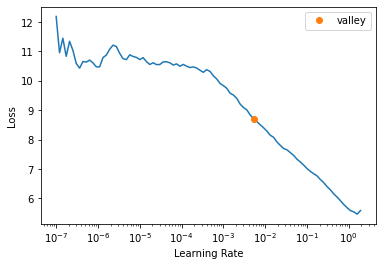

<Figure size 720x720 with 0 Axes>

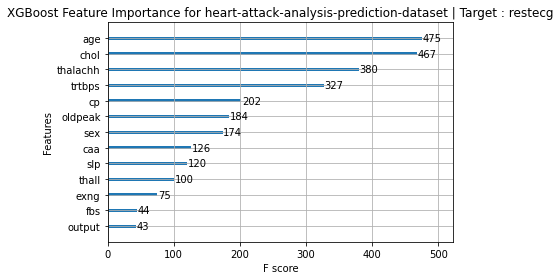

Target Variable: fbs
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 12%|█▏        | 5/42 [00:00<00:00, 48.87it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.045749571725120175, 'Adjusted R-Squared': -0.3412874941691757, 'RMSE': 0.39569173578256883, 'Time taken': 0.0337674617767334}
{'Model': 'BaggingRegressor', 'R-Squared': -0.16437847866419242, 'Adjusted R-Squared': -0.49344196176494237, 'RMSE': 0.41753243386991307, 'Time taken': 0.034597158432006836}
{'Model': 'BayesianRidge', 'R-Squared': -0.038492747334895716, 'Adjusted R-Squared': -0.33197982810345317, 'RMSE': 0.39431642356442803, 'Time taken': 0.011873960494995117}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7810760667903516, 'Adjusted R-Squared': -1.284423650883277, 'RMSE': 0.5163977794943222, 'Time taken': 0.011637687683105469}
{'Model': 'DummyRegressor', 'R-Squared': -0.012256353324000546, 'Adjusted R-Squared': -0.29832880100252246, 'RMSE': 0.38930357136588456, 'Time taken': 0.010086297988891602}
{'Model': 'ElasticNet', 'R-Squared': -0.012256330774201407, 'Adjusted R-Squared': -0.2983287720799539, 'RMSE': 0.3893036, 'Time taken

 24%|██▍       | 10/42 [00:00<00:01, 26.50it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.178192949907235, 'Adjusted R-Squared': -0.5111605227071057, 'RMSE': 0.4200019841222975, 'Time taken': 0.13881731033325195}
{'Model': 'GammaRegressor', 'R-Squared': -0.038291853635010975, 'Adjusted R-Squared': -0.3317221600970792, 'RMSE': 0.3942782819804614, 'Time taken': 0.01370549201965332}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.0814793200737824, 'Adjusted R-Squared': -6.800158258355503, 'RMSE': 0.9542183178916323, 'Time taken': 0.04207253456115723}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.03674812231155866, 'Adjusted R-Squared': -0.3297421568778687, 'RMSE': 0.39398506666776456, 'Time taken': 0.05965232849121094}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.1788151199662782, 'Adjusted R-Squared': -0.5119585234350088, 'RMSE': 0.42011286501428013, 'Time taken': 0.11651039123535156}


 33%|███▎      | 14/42 [00:00<00:01, 16.20it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.15260032329667617, 'Adjusted R-Squared': -0.4783351972718237, 'RMSE': 0.4154153123538301, 'Time taken': 0.1696457862854004}


 40%|████      | 17/42 [00:00<00:01, 17.75it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.22448979487587595, 'Adjusted R-Squared': -0.570541258645145, 'RMSE': 0.4281744191065707, 'Time taken': 0.05636453628540039}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.03302411873840416, 'Adjusted R-Squared': -0.32496571751230086, 'RMSE': 0.39327683210007003, 'Time taken': 0.014763593673706055}
{'Model': 'KernelRidge', 'R-Squared': -9.476221225478428, 'Adjusted R-Squared': -12.436892441374503, 'RMSE': 1.252407, 'Time taken': 0.05833005905151367}
{'Model': 'Lars', 'R-Squared': -0.07661661381751927, 'Adjusted R-Squared': -0.3808778307659486, 'RMSE': 0.40148901840788015, 'Time taken': 0.05046844482421875}


 55%|█████▍    | 23/42 [00:01<00:00, 20.18it/s]

{'Model': 'LarsCV', 'R-Squared': -0.012256336975042359, 'Adjusted R-Squared': -0.2983287800332064, 'RMSE': 0.3893035682220624, 'Time taken': 0.07200837135314941}
{'Model': 'Lasso', 'R-Squared': -0.012256330774201407, 'Adjusted R-Squared': -0.2983287720799539, 'RMSE': 0.3893036, 'Time taken': 0.012949943542480469}
{'Model': 'LassoCV', 'R-Squared': -0.012256330774201407, 'Adjusted R-Squared': -0.2983287720799539, 'RMSE': 0.3893036, 'Time taken': 0.07195496559143066}
{'Model': 'LassoLars', 'R-Squared': -0.012256336975042359, 'Adjusted R-Squared': -0.2983287800332064, 'RMSE': 0.3893035682220624, 'Time taken': 0.013262271881103516}
{'Model': 'LassoLarsCV', 'R-Squared': -0.012256336975042359, 'Adjusted R-Squared': -0.2983287800332064, 'RMSE': 0.3893035682220624, 'Time taken': 0.031342267990112305}
{'Model': 'LassoLarsIC', 'R-Squared': -0.022853650387519853, 'Adjusted R-Squared': -0.3119209863666015, 'RMSE': 0.3913360723778624, 'Time taken': 0.017472267150878906}
{'Model': 'LinearRegression',

 69%|██████▉   | 29/42 [00:03<00:02,  5.52it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.2719158980513623, 'Adjusted R-Squared': -0.631370390978921, 'RMSE': 0.43638752816278276, 'Time taken': 1.950486421585083}
{'Model': 'NuSVR', 'R-Squared': -0.20373315928518432, 'Adjusted R-Squared': -0.5439186173440407, 'RMSE': 0.4245298618127517, 'Time taken': 0.08711004257202148}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.06104614508035411, 'Adjusted R-Squared': -0.36090701216828025, 'RMSE': 0.3985751958184968, 'Time taken': 0.020956039428710938}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.06104614508035411, 'Adjusted R-Squared': -0.36090701216828025, 'RMSE': 0.3985751958184968, 'Time taken': 0.02064228057861328}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.8647614216034587, 'Adjusted R-Squared': -1.3917592146653055, 'RMSE': 0.5283902193992052, 'Time taken': 0.012017250061035156}
{'Model': 'PoissonRegressor', 'R-Squared': -0.03819744538601433, 'Adjusted R-Squared': -0.3316010712559747, 'RMSE': 0.394260356399

 79%|███████▊  | 33/42 [00:03<00:01,  7.98it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████| 42/42 [00:03<00:00, 11.18it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.11368460111317202, 'Adjusted R-Squared': -0.4284215536016771, 'RMSE': 0.4083421767749853, 'Time taken': 0.20469427108764648}
{'Model': 'Ridge', 'R-Squared': -0.07602581285020071, 'Adjusted R-Squared': -0.38012006430786616, 'RMSE': 0.40137884, 'Time taken': 0.012768268585205078}
{'Model': 'RidgeCV', 'R-Squared': -0.07123086050563399, 'Adjusted R-Squared': -0.3739700167354869, 'RMSE': 0.4004835389225467, 'Time taken': 0.011575698852539062}
{'Model': 'SGDRegressor', 'R-Squared': -0.06824643111110262, 'Adjusted R-Squared': -0.37014216164250113, 'RMSE': 0.39992527995478405, 'Time taken': 0.014032840728759766}
{'Model': 'SVR', 'R-Squared': -0.132852344048918, 'Adjusted R-Squared': -0.4530062673670905, 'RMSE': 0.41184119560900845, 'Time taken': 0.01710820198059082}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.07661657216144446, 'Adjusted R-Squared': -0.3808777773375047, 'RMSE': 0.401489, 'Time taken': 0.012020349502563477}
{'Model'

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,21.979712,6.931797,2.632831,00:00
1,13.385861,4.253284,2.062349,00:00
2,12.691129,4.811710,2.193561,00:00


Better model found at epoch 0 with _rmse value: 2.6328306198120117.
Better model found at epoch 1 with _rmse value: 2.062349319458008.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.28
1       1       1.80
2       2       1.00
3       1       1.47
4       1       1.06
XGBoost RMSE:  0.42038837


<Figure size 432x288 with 0 Axes>

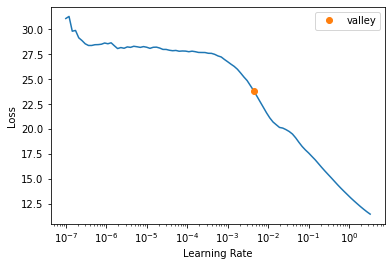

<Figure size 720x720 with 0 Axes>

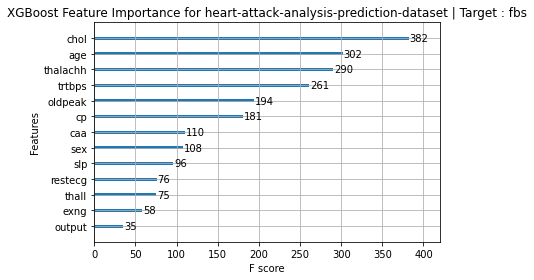

Target Variable: chol
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'thalachh', 'oldpeak']
13
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 17%|█▋        | 7/42 [00:00<00:01, 30.47it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.09656098986995443, 'Adjusted R-Squared': -0.15875873038418886, 'RMSE': 49.16039351866734, 'Time taken': 0.09896969795227051}
{'Model': 'BaggingRegressor', 'R-Squared': -0.1861548903490038, 'Adjusted R-Squared': -0.521372576751983, 'RMSE': 56.32959553674545, 'Time taken': 0.038353919982910156}
{'Model': 'BayesianRidge', 'R-Squared': 0.08399461493995652, 'Adjusted R-Squared': -0.17487647214222957, 'RMSE': 49.50111078474793, 'Time taken': 0.014107465744018555}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7267903200348256, 'Adjusted R-Squared': -1.2147962800446677, 'RMSE': 67.96506455525515, 'Time taken': 0.012586116790771484}
{'Model': 'DummyRegressor', 'R-Squared': -0.023228823724171344, 'Adjusted R-Squared': -0.31240218695056754, 'RMSE': 52.318142, 'Time taken': 0.010418415069580078}
{'Model': 'ElasticNet', 'R-Squared': 0.07952642181898195, 'Adjusted R-Squared': -0.18060741549304482, 'RMSE': 49.621693, 'Time taken': 0.01150631904602050

 26%|██▌       | 11/42 [00:00<00:01, 22.65it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.33243027314457274, 'Adjusted R-Squared': -0.7089866546854302, 'RMSE': 59.70190330578526, 'Time taken': 0.16814947128295898}
{'Model': 'GammaRegressor', 'R-Squared': 0.0738936271519024, 'Adjusted R-Squared': -0.18783208691386433, 'RMSE': 49.77329217260697, 'Time taken': 0.013223409652709961}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -12.270484052739741, 'Adjusted R-Squared': -16.02083824155749, 'RMSE': 188.41232693417152, 'Time taken': 0.0309908390045166}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.07352536716601965, 'Adjusted R-Squared': -0.1883044203740183, 'RMSE': 49.78318719688307, 'Time taken': 0.05327963829040527}


 33%|███▎      | 14/42 [00:00<00:01, 15.25it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.07462323322274167, 'Adjusted R-Squared': -0.3783211034813425, 'RMSE': 53.61595474034922, 'Time taken': 0.11539411544799805}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.07448559204685146, 'Adjusted R-Squared': -0.378144563712266, 'RMSE': 53.61252097903184, 'Time taken': 0.1522841453552246}
{'Model': 'HuberRegressor', 'R-Squared': 0.055457200054040645, 'Adjusted R-Squared': -0.21147880862633905, 'RMSE': 50.26628067850452, 'Time taken': 0.02032613754272461}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.11817405792885194, 'Adjusted R-Squared': -0.43417976995222296, 'RMSE': 54.6916, 'Time taken': 0.013658523559570312}


 45%|████▌     | 19/42 [00:00<00:01, 20.47it/s]

{'Model': 'KernelRidge', 'R-Squared': -23.09074091706903, 'Adjusted R-Squared': -29.898993784936362, 'RMSE': 253.8581, 'Time taken': 0.022866249084472656}
{'Model': 'Lars', 'R-Squared': 0.08355460072590892, 'Adjusted R-Squared': -0.17544083819937772, 'RMSE': 49.51299858454977, 'Time taken': 0.020982027053833008}
{'Model': 'LarsCV', 'R-Squared': 0.05775814137144708, 'Adjusted R-Squared': -0.20852760128444814, 'RMSE': 50.20501808358246, 'Time taken': 0.05963468551635742}
{'Model': 'Lasso', 'R-Squared': 0.08040263455630126, 'Adjusted R-Squared': -0.1794835774169179, 'RMSE': 49.59807, 'Time taken': 0.025322437286376953}
{'Model': 'LassoCV', 'R-Squared': 0.06285039901449774, 'Adjusted R-Squared': -0.20199622735097011, 'RMSE': 50.069168, 'Time taken': 0.07671928405761719}


 52%|█████▏    | 22/42 [00:01<00:00, 21.19it/s]

{'Model': 'LassoLars', 'R-Squared': -0.023228819682938884, 'Adjusted R-Squared': -0.31240218176724754, 'RMSE': 52.31814207368395, 'Time taken': 0.017540931701660156}
{'Model': 'LassoLarsCV', 'R-Squared': 0.05775814137144708, 'Adjusted R-Squared': -0.20852760128444814, 'RMSE': 50.20501808358246, 'Time taken': 0.0336604118347168}
{'Model': 'LassoLarsIC', 'R-Squared': 0.06819092178398678, 'Adjusted R-Squared': -0.19514642640749513, 'RMSE': 49.926302028314915, 'Time taken': 0.01623058319091797}
{'Model': 'LinearRegression', 'R-Squared': 0.08355483429913346, 'Adjusted R-Squared': -0.1754405386163287, 'RMSE': 49.512993, 'Time taken': 0.012263774871826172}
{'Model': 'LinearSVR', 'R-Squared': -1.3231452685916083, 'Adjusted R-Squared': -1.979686322758802, 'RMSE': 78.83228495510996, 'Time taken': 0.012533903121948242}


 74%|███████▍  | 31/42 [00:03<00:01,  6.93it/s]

{'Model': 'MLPRegressor', 'R-Squared': -12.787619636416094, 'Adjusted R-Squared': -16.684120838011946, 'RMSE': 192.048348991634, 'Time taken': 2.044285535812378}
{'Model': 'NuSVR', 'R-Squared': -0.026890811017507454, 'Adjusted R-Squared': -0.3170990836963681, 'RMSE': 52.41167807861829, 'Time taken': 0.03083944320678711}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.021060358151731573, 'Adjusted R-Squared': -0.25559649715321386, 'RMSE': 51.17335474936782, 'Time taken': 0.023098468780517578}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.006457744625191775, 'Adjusted R-Squared': -0.27432593624160173, 'RMSE': 51.55361242289933, 'Time taken': 0.03553462028503418}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.029505243111264234, 'Adjusted R-Squared': -0.24476501427033504, 'RMSE': 50.952151563725984, 'Time taken': 0.021778106689453125}
{'Model': 'PoissonRegressor', 'R-Squared': 0.0940008951886282, 'Adjusted R-Squared': -0.1620423300841507, 'RMSE': 49.22999767953339,

100%|██████████| 42/42 [00:03<00:00, 11.05it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.06566190850044884, 'Adjusted R-Squared': -0.36682723046796695, 'RMSE': 53.39193397258927, 'Time taken': 0.22175383567810059}
{'Model': 'Ridge', 'R-Squared': 0.08393191183370319, 'Adjusted R-Squared': -0.1749568956915546, 'RMSE': 49.502804, 'Time taken': 0.014371395111083984}
{'Model': 'RidgeCV', 'R-Squared': 0.08676644945157552, 'Adjusted R-Squared': -0.17132129309471833, 'RMSE': 49.42615880006124, 'Time taken': 0.011899232864379883}
{'Model': 'SGDRegressor', 'R-Squared': 0.08299476828955743, 'Adjusted R-Squared': -0.17615888415035008, 'RMSE': 49.52811937120186, 'Time taken': 0.011651754379272461}
{'Model': 'SVR', 'R-Squared': -0.03083653540329756, 'Adjusted R-Squared': -0.32215990410422934, 'RMSE': 52.51227483185912, 'Time taken': 0.015270709991455078}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.08355483429913346, 'Adjusted R-Squared': -0.1754405386163287, 'RMSE': 49.512993, 'Time taken': 0.011612892150878906}
{'Model': 'Tw

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,63406.808594,66134.851562,257.166962,00:00
1,62280.324219,64415.824219,253.802734,00:00
2,59360.441406,57549.480469,239.894730,00:00
3,55169.507812,35605.824219,188.695053,00:00
4,48042.234375,4995.556641,70.679253,00:00
5,39762.082031,38505.980469,196.229401,00:00


Better model found at epoch 0 with _rmse value: 257.1669616699219.
Better model found at epoch 1 with _rmse value: 253.802734375.
Better model found at epoch 2 with _rmse value: 239.8947296142578.
Better model found at epoch 3 with _rmse value: 188.69505310058594.
Better model found at epoch 4 with _rmse value: 70.67925262451172.
No improvement since epoch 4: early stopping


,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age,trtbps,thalachh,oldpeak,chol,chol_pred
0,1.00,3.00,2.00,2.00,1.00,3.00,1.00,3.00,2.00,0.59,-0.66,-2.32,-0.91,178.00,295.98
1,2.00,2.00,1.00,2.00,1.00,3.00,1.00,3.00,2.00,-0.59,-0.07,0.98,-0.40,266.00,307.31
2,2.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,1.00,1.35,-0.66,-0.87,1.31,229.00,243.47
3,2.00,1.00,1.00,1.00,1.00,2.00,1.00,3.00,2.00,1.24,-0.66,0.10,-0.57,302.00,318.98
4,1.00,1.00,1.00,1.00,1.00,2.00,1.00,3.00,2.00,-0.16,-0.07,-0.26,-0.57,264.00,274.36
5,2.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,1.00,0.59,0.81,-0.30,1.48,282.00,242.26
6,2.00,3.00,2.00,1.00,1.00,3.00,1.00,3.00,2.00,0.38,0.51,0.71,-0.91,211.00,213.79
7,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,1.00,0.16,0.16,0.05,0.71,409.00,243.30
8,2.00,1.00,1.00,2.00,2.00,2.00,2.00,4.00,1.00,0.27,1.22,-2.67,0.12,274.00,259.26


<Figure size 432x288 with 0 Axes>

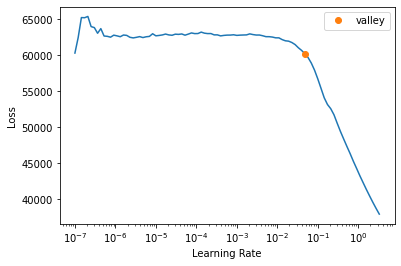

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  246.00     181.61
1  313.00     218.73
2  409.00     241.18
3  245.00     249.77
4  353.00     161.13
XGBoost RMSE:  62.5498


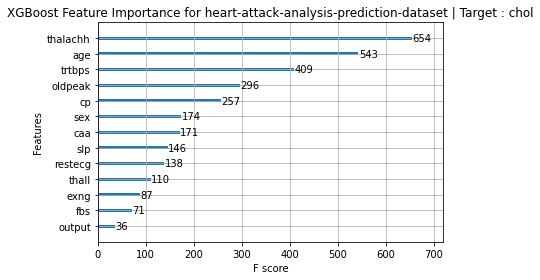

Target Variable: trtbps
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'chol', 'thalachh', 'oldpeak']
13
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 17%|█▋        | 7/42 [00:00<00:01, 30.04it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06126864257430453, 'Adjusted R-Squared': -0.20402500191556583, 'RMSE': 19.443315039396396, 'Time taken': 0.10134553909301758}
{'Model': 'BaggingRegressor', 'R-Squared': -0.1020236955549183, 'Adjusted R-Squared': -0.4134651747334821, 'RMSE': 21.066632383938348, 'Time taken': 0.03825950622558594}
{'Model': 'BayesianRidge', 'R-Squared': 0.0813979037132988, 'Adjusted R-Squared': -0.1782070365416384, 'RMSE': 19.233723415442622, 'Time taken': 0.012255668640136719}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.4798669419259136, 'Adjusted R-Squared': -0.8980902081223674, 'RMSE': 24.41242852865455, 'Time taken': 0.0126190185546875}
{'Model': 'DummyRegressor', 'R-Squared': -0.016741585528648795, 'Adjusted R-Squared': -0.30408159883022345, 'RMSE': 20.23508, 'Time taken': 0.010627985000610352}
{'Model': 'ElasticNet', 'R-Squared': 0.05310113169527586, 'Adjusted R-Squared': -0.21450072239084172, 'RMSE': 19.527716, 'Time taken': 0.011624813079833984}

 24%|██▍       | 10/42 [00:00<00:01, 20.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.017185081620448184, 'Adjusted R-Squared': -0.30465043077405296, 'RMSE': 20.239493570739363, 'Time taken': 0.19599390029907227}
{'Model': 'GammaRegressor', 'R-Squared': 0.06800170772083736, 'Adjusted R-Squared': -0.19538911401023018, 'RMSE': 19.373460817790424, 'Time taken': 0.013881444931030273}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -24.795308792397186, 'Adjusted R-Squared': -32.08528736416161, 'RMSE': 101.9224878697477, 'Time taken': 0.03259754180908203}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.06859695012578515, 'Adjusted R-Squared': -0.19462565092562323, 'RMSE': 19.367273173793073, 'Time taken': 0.026784896850585938}


 31%|███       | 13/42 [00:00<00:01, 17.88it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.14417489745868628, 'Adjusted R-Squared': -0.46752867282744526, 'RMSE': 21.4657396727381, 'Time taken': 0.14132928848266602}


 43%|████▎     | 18/42 [00:01<00:02,  8.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.04807328961824986, 'Adjusted R-Squared': -0.3442679149451464, 'RMSE': 20.544495308865717, 'Time taken': 0.8789792060852051}
{'Model': 'HuberRegressor', 'R-Squared': 0.09873430784211379, 'Adjusted R-Squared': -0.15597121385468005, 'RMSE': 19.05136379381089, 'Time taken': 0.02548384666442871}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.0574539610529885, 'Adjusted R-Squared': -0.3562996456983982, 'RMSE': 20.63623, 'Time taken': 0.017812013626098633}
{'Model': 'KernelRidge', 'R-Squared': -43.74371195551062, 'Adjusted R-Squared': -56.388674029894055, 'RMSE': 134.23497, 'Time taken': 0.07602334022521973}
{'Model': 'Lars', 'R-Squared': 0.09326256767072816, 'Adjusted R-Squared': -0.16298931537884864, 'RMSE': 19.1091083473635, 'Time taken': 0.06067657470703125}


 62%|██████▏   | 26/42 [00:02<00:01, 15.68it/s]

{'Model': 'LarsCV', 'R-Squared': 0.0518835431458039, 'Adjusted R-Squared': -0.21606241205212107, 'RMSE': 19.540266964544088, 'Time taken': 0.0744636058807373}
{'Model': 'Lasso', 'R-Squared': 0.05256837819861304, 'Adjusted R-Squared': -0.21518403665830066, 'RMSE': 19.533209, 'Time taken': 0.013788223266601562}
{'Model': 'LassoCV', 'R-Squared': 0.05362599102668453, 'Adjusted R-Squared': -0.21382753324838277, 'RMSE': 19.522303, 'Time taken': 0.07793879508972168}
{'Model': 'LassoLars', 'R-Squared': -0.016741581081014756, 'Adjusted R-Squared': -0.3040815931256493, 'RMSE': 20.23508080205153, 'Time taken': 0.013956785202026367}
{'Model': 'LassoLarsCV', 'R-Squared': 0.0518835431458039, 'Adjusted R-Squared': -0.21606241205212107, 'RMSE': 19.540266964544088, 'Time taken': 0.03708481788635254}
{'Model': 'LassoLarsIC', 'R-Squared': 0.05161363097980265, 'Adjusted R-Squared': -0.21640860374329662, 'RMSE': 19.543048152672913, 'Time taken': 0.018670082092285156}
{'Model': 'LinearRegression', 'R-Square

 69%|██████▉   | 29/42 [00:03<00:02,  4.70it/s]

{'Model': 'MLPRegressor', 'R-Squared': -14.37341352062058, 'Adjusted R-Squared': -18.718073863404655, 'RMSE': 78.68370564521285, 'Time taken': 1.7009410858154297}
{'Model': 'NuSVR', 'R-Squared': 0.003119850949599212, 'Adjusted R-Squared': -0.2786071476950791, 'RMSE': 20.036466029135084, 'Time taken': 0.07420468330383301}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.121994979878432, 'Adjusted R-Squared': -0.12613687363418502, 'RMSE': 18.803909397380426, 'Time taken': 0.030066490173339844}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.05982360495500172, 'Adjusted R-Squared': -0.20587841973162813, 'RMSE': 19.458274333787923, 'Time taken': 0.025424718856811523}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.1721500796911808, 'Adjusted R-Squared': -0.5034098848212971, 'RMSE': 21.726574603124472, 'Time taken': 0.012814521789550781}
{'Model': 'PoissonRegressor', 'R-Squared': 0.09372015953080737, 'Adjusted R-Squared': -0.16240240408005135, 'RMSE': 19.104285961299542

 79%|███████▊  | 33/42 [00:03<00:01,  6.55it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -1.7565108893833452, 'Adjusted R-Squared': -2.535524836382986, 'RMSE': 33.318047, 'Time taken': 0.09128022193908691}


100%|██████████| 42/42 [00:04<00:00,  9.56it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.06558572058462342, 'Adjusted R-Squared': -0.19848788011972207, 'RMSE': 19.398555143790134, 'Time taken': 0.23029327392578125}
{'Model': 'Ridge', 'R-Squared': 0.09325407316379564, 'Adjusted R-Squared': -0.16300021050730562, 'RMSE': 19.109198, 'Time taken': 0.012372016906738281}
{'Model': 'RidgeCV', 'R-Squared': 0.09299523910634122, 'Adjusted R-Squared': -0.1633321933201275, 'RMSE': 19.111925058052407, 'Time taken': 0.012251853942871094}
{'Model': 'SGDRegressor', 'R-Squared': 0.09635771296509021, 'Adjusted R-Squared': -0.15901945510999282, 'RMSE': 19.076466027649754, 'Time taken': 0.014703512191772461}
{'Model': 'SVR', 'R-Squared': -0.0013128745323962576, 'Adjusted R-Squared': -0.2842925999437256, 'RMSE': 20.080963675159705, 'Time taken': 0.0164182186126709}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.09326260973143452, 'Adjusted R-Squared': -0.16298926143142078, 'RMSE': 19.109108, 'Time taken': 0.011883258819580078}
{'Model': 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,17137.853516,18060.458984,134.389206,00:00
1,16591.841797,17174.554688,131.051727,00:00
2,15385.060547,14446.847656,120.195038,00:00
3,13254.699219,6362.693359,79.766495,00:00
4,10679.714844,1101.994629,33.196304,00:00
5,8973.123047,1483.930542,38.521820,00:00


Better model found at epoch 0 with _rmse value: 134.3892059326172.
Better model found at epoch 1 with _rmse value: 131.05172729492188.
Better model found at epoch 2 with _rmse value: 120.19503784179688.
Better model found at epoch 3 with _rmse value: 79.76649475097656.
Better model found at epoch 4 with _rmse value: 33.19630432128906.
No improvement since epoch 4: early stopping


,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age,chol,thalachh,oldpeak,trtbps,trtbps_pred
0,2.00,1.00,1.00,1.00,2.00,2.00,2.00,4.00,1.00,-0.02,0.38,-1.74,0.96,124.00,176.93
1,2.00,2.00,1.00,2.00,1.00,1.00,1.00,3.00,2.00,0.21,-0.11,0.89,-0.93,120.00,135.50
2,1.00,4.00,2.00,1.00,1.00,3.00,1.00,3.00,2.00,0.43,0.69,0.59,-0.07,150.00,133.45
3,1.00,2.00,1.00,2.00,1.00,3.00,3.00,3.00,2.00,1.89,1.04,0.59,-0.59,160.00,123.47
4,1.00,3.00,1.00,2.00,1.00,3.00,1.00,3.00,2.00,0.43,1.75,1.03,-0.93,120.00,121.23
5,2.00,3.00,2.00,2.00,1.00,1.00,1.00,4.00,2.00,-1.36,-0.11,1.99,-0.25,120.00,126.63
6,1.00,1.00,1.00,2.00,2.00,2.00,1.00,4.00,1.00,0.32,-0.09,-1.12,-0.76,140.00,169.05
7,1.00,3.00,1.00,1.00,2.00,3.00,1.00,3.00,2.00,-1.47,0.41,1.03,-0.93,112.00,162.23
8,2.00,4.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,0.55,0.45,-0.16,2.68,178.00,137.26


<Figure size 432x288 with 0 Axes>

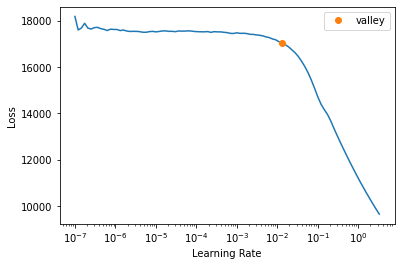

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  138.00     118.85
1  124.00     131.92
2  178.00     155.53
3  140.00     124.74
4  135.00     129.88
XGBoost RMSE:  21.456167


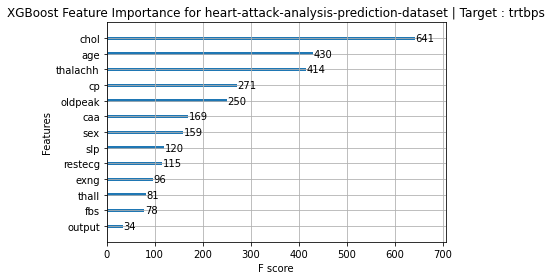

Target Variable: cp
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 12%|█▏        | 5/42 [00:00<00:00, 47.84it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.0891836047052954, 'Adjusted R-Squared': -0.16822102874755585, 'RMSE': 1.0303431999226411, 'Time taken': 0.03472638130187988}
{'Model': 'BaggingRegressor', 'R-Squared': 0.16248808388941827, 'Adjusted R-Squared': -0.07420006631574605, 'RMSE': 0.9880114709185651, 'Time taken': 0.03534746170043945}
{'Model': 'BayesianRidge', 'R-Squared': 0.22566442130583342, 'Adjusted R-Squared': 0.00683045341400379, 'RMSE': 0.9500163870225143, 'Time taken': 0.011714935302734375}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.32983794089609164, 'Adjusted R-Squared': -0.7056617068015087, 'RMSE': 1.2449899597988732, 'Time taken': 0.011962890625}
{'Model': 'DummyRegressor', 'R-Squared': -1.2761738537259149e-05, 'Adjusted R-Squared': -0.28262506396899334, 'RMSE': 1.0796158715352446, 'Time taken': 0.010404109954833984}
{'Model': 'ElasticNet', 'R-Squared': -1.2740176757120025e-05, 'Adjusted R-Squared': -0.28262503631366664, 'RMSE': 1.0796157, 'Time taken': 0.0130

 24%|██▍       | 10/42 [00:00<00:01, 25.53it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.11778408007626295, 'Adjusted R-Squared': -0.1315378103369671, 'RMSE': 1.0140373102931997, 'Time taken': 0.15187692642211914}
{'Model': 'GammaRegressor', 'R-Squared': 0.17772288754328347, 'Adjusted R-Squared': -0.054659774672745076, 'RMSE': 0.9789839920193313, 'Time taken': 0.016015291213989258}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6677905408276468, 'Adjusted R-Squared': -2.4217313458441554, 'RMSE': 1.7633655565197546, 'Time taken': 0.03203701972961426}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.19808347792328906, 'Adjusted R-Squared': -0.02854510440273783, 'RMSE': 0.9667875968372265, 'Time taken': 0.04968595504760742}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.11563249614000237, 'Adjusted R-Squared': -0.13429745060304032, 'RMSE': 1.0152730949241289, 'Time taken': 0.13064098358154297}


 33%|███▎      | 14/42 [00:00<00:01, 15.72it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.11090434304695296, 'Adjusted R-Squared': -0.14036182087456028, 'RMSE': 1.0179834882658658, 'Time taken': 0.1855776309967041}


 43%|████▎     | 18/42 [00:00<00:01, 17.83it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.22800658766547377, 'Adjusted R-Squared': 0.009834536353542478, 'RMSE': 0.9485785210507339, 'Time taken': 0.025792598724365234}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.19866539561487118, 'Adjusted R-Squared': -0.027798731711360825, 'RMSE': 0.9664367542679655, 'Time taken': 0.01584029197692871}
{'Model': 'KernelRidge', 'R-Squared': -3.622064432976244, 'Adjusted R-Squared': -4.928300033599965, 'RMSE': 2.3210502, 'Time taken': 0.05343365669250488}
{'Model': 'Lars', 'R-Squared': 0.22495062965509083, 'Adjusted R-Squared': 0.005914938035877393, 'RMSE': 0.9504541543048481, 'Time taken': 0.07472443580627441}


 50%|█████     | 21/42 [00:01<00:01, 18.09it/s]

{'Model': 'LarsCV', 'R-Squared': 0.2311588177371522, 'Adjusted R-Squared': 0.013877614054173537, 'RMSE': 0.9466399058387321, 'Time taken': 0.057282447814941406}
{'Model': 'Lasso', 'R-Squared': -1.2740176757120025e-05, 'Adjusted R-Squared': -0.28262503631366664, 'RMSE': 1.0796157, 'Time taken': 0.015842199325561523}
{'Model': 'LassoCV', 'R-Squared': 0.23172711010221536, 'Adjusted R-Squared': 0.014606510783276239, 'RMSE': 0.94628996, 'Time taken': 0.07935762405395508}
{'Model': 'LassoLars', 'R-Squared': -1.2761718977127856e-05, 'Adjusted R-Squared': -0.2826250639439054, 'RMSE': 1.0796158715246862, 'Time taken': 0.014983892440795898}
{'Model': 'LassoLarsCV', 'R-Squared': 0.2311588177371522, 'Adjusted R-Squared': 0.013877614054173537, 'RMSE': 0.9466399058387321, 'Time taken': 0.0354619026184082}
{'Model': 'LassoLarsIC', 'R-Squared': 0.2299708982074583, 'Adjusted R-Squared': 0.012353978135653088, 'RMSE': 0.9473709397768919, 'Time taken': 0.016051769256591797}
{'Model': 'LinearRegression', '

 71%|███████▏  | 30/42 [00:03<00:01,  7.28it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0521116148649452, 'Adjusted R-Squared': -0.2157698852819181, 'RMSE': 1.0511025512958987, 'Time taken': 1.7867636680603027}
{'Model': 'NuSVR', 'R-Squared': 0.21562427691519537, 'Adjusted R-Squared': -0.006047123087032036, 'RMSE': 0.9561555739964077, 'Time taken': 0.03712940216064453}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2320923754666041, 'Adjusted R-Squared': 0.015075003315861868, 'RMSE': 0.9460650072422978, 'Time taken': 0.026189565658569336}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.24376761906127387, 'Adjusted R-Squared': 0.03004977227424266, 'RMSE': 0.9388454893613418, 'Time taken': 0.03597068786621094}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.03539006684319057, 'Adjusted R-Squared': -0.23721708817938603, 'RMSE': 1.0603331865668415, 'Time taken': 0.014461278915405273}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2041514139051248, 'Adjusted R-Squared': -0.02076231694777464, 'RMSE': 0.963122910590292

 79%|███████▊  | 33/42 [00:03<00:01,  8.96it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.11054695440852247, 'Adjusted R-Squared': -0.4243971806544091, 'RMSE': 1.1377188, 'Time taken': 0.08051276206970215}


100%|██████████| 42/42 [00:03<00:00, 11.68it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.1673555767397521, 'Adjusted R-Squared': -0.06795697765988318, 'RMSE': 0.9851362003973528, 'Time taken': 0.2132253646850586}
{'Model': 'Ridge', 'R-Squared': 0.22513682990759354, 'Adjusted R-Squared': 0.006153760098870031, 'RMSE': 0.95034, 'Time taken': 0.012312889099121094}
{'Model': 'RidgeCV', 'R-Squared': 0.2263306453398498, 'Adjusted R-Squared': 0.007684958153285737, 'RMSE': 0.9496076107989128, 'Time taken': 0.011690378189086914}
{'Model': 'SGDRegressor', 'R-Squared': 0.22193622517010658, 'Adjusted R-Squared': 0.002048636631223677, 'RMSE': 0.9523006643542306, 'Time taken': 0.013469219207763672}
{'Model': 'SVR', 'R-Squared': 0.13899962349249317, 'Adjusted R-Squared': -0.104326569868324, 'RMSE': 1.0017703190720664, 'Time taken': 0.01741194725036621}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.22495088763005922, 'Adjusted R-Squared': 0.005915268916815153, 'RMSE': 0.950454, 'Time taken': 0.012118816375732422}
{'Model': 'Tweedie

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6.366297,4.224213,2.055289,00:00
1,6.228068,11.789171,3.433536,00:00


Better model found at epoch 0 with _rmse value: 2.0552890300750732.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.49
1       1       2.25
2       1       1.05
3       3       1.49
4       1       1.04
XGBoost RMSE:  1.1308697


<Figure size 432x288 with 0 Axes>

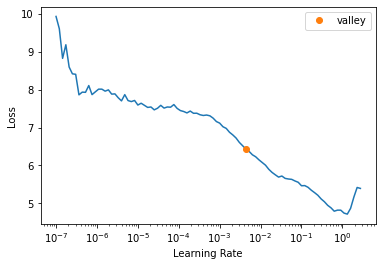

<Figure size 720x720 with 0 Axes>

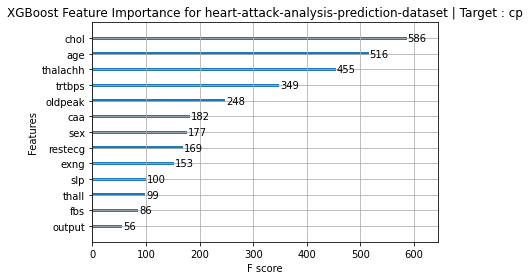

Target Variable: sex
CATS=====================
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
CONTS=====================
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
14
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables that made the cut : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Tabular Object size: 302


 14%|█▍        | 6/42 [00:00<00:00, 55.32it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.17146291144521075, 'Adjusted R-Squared': -0.06268887445070792, 'RMSE': 0.4341568698595181, 'Time taken': 0.028800487518310547}
{'Model': 'BaggingRegressor', 'R-Squared': 0.1304029304029305, 'Adjusted R-Squared': -0.11535276317885002, 'RMSE': 0.44478459205927234, 'Time taken': 0.03390836715698242}
{'Model': 'BayesianRidge', 'R-Squared': 0.04314679050489889, 'Adjusted R-Squared': -0.2272682469611078, 'RMSE': 0.46656629235311836, 'Time taken': 0.011699199676513672}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.3919413919413919, 'Adjusted R-Squared': -0.7853161331422198, 'RMSE': 0.5627314338711378, 'Time taken': 0.012124061584472656}
{'Model': 'DummyRegressor', 'R-Squared': -0.007062058902780111, 'Adjusted R-Squared': -0.29166655381008755, 'RMSE': 0.4786508314004923, 'Time taken': 0.010192632675170898}
{'Model': 'ElasticNet', 'R-Squared': -0.007062047719955444, 'Adjusted R-Squared': -0.29166653946689935, 'RMSE': 0.4786508, 'Time taken': 0.

 29%|██▊       | 12/42 [00:00<00:01, 28.66it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.15427106227106224, 'Adjusted R-Squared': -0.08473928969581146, 'RMSE': 0.4386380436457072, 'Time taken': 0.13842010498046875}
{'Model': 'GammaRegressor', 'R-Squared': 0.06843541658025709, 'Adjusted R-Squared': -0.19483283525575712, 'RMSE': 0.46035957981559533, 'Time taken': 0.013678550720214844}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.826146299833585, 'Adjusted R-Squared': -7.755274601960467, 'RMSE': 1.2461734563102125, 'Time taken': 0.024016857147216797}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.06494406050362223, 'Adjusted R-Squared': -0.19931087891926702, 'RMSE': 0.46122145032015366, 'Time taken': 0.024605512619018555}


 38%|███▊      | 16/42 [00:00<00:01, 19.01it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.016412837278876102, 'Adjusted R-Squared': -0.2615574478379632, 'RMSE': 0.4730391944850402, 'Time taken': 0.14841437339782715}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.1013573145320692, 'Adjusted R-Squared': -0.4126104686389582, 'RMSE': 0.5005584771593083, 'Time taken': 0.14829397201538086}
{'Model': 'HuberRegressor', 'R-Squared': -0.02359122750528253, 'Adjusted R-Squared': -0.31286700919155797, 'RMSE': 0.48256295367283614, 'Time taken': 0.022598981857299805}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.00219780219780219, 'Adjusted R-Squared': -0.2854276158623983, 'RMSE': 0.4774934554525329, 'Time taken': 0.015321969985961914}


 45%|████▌     | 19/42 [00:00<00:01, 17.88it/s]

{'Model': 'KernelRidge', 'R-Squared': -12.357367576696934, 'Adjusted R-Squared': -16.132275804893894, 'RMSE': 1.7432158, 'Time taken': 0.04278254508972168}
{'Model': 'Lars', 'R-Squared': 0.0012337838763301079, 'Adjusted R-Squared': -0.2810262337238374, 'RMSE': 0.4766752711942743, 'Time taken': 0.07874941825866699}
{'Model': 'LarsCV', 'R-Squared': 0.048649063813513416, 'Adjusted R-Squared': -0.22021098336962397, 'RMSE': 0.4652228906475107, 'Time taken': 0.06702733039855957}
{'Model': 'Lasso', 'R-Squared': -0.007062047719955444, 'Adjusted R-Squared': -0.29166653946689935, 'RMSE': 0.4786508, 'Time taken': 0.01400136947631836}


 52%|█████▏    | 22/42 [00:01<00:01, 19.90it/s]

{'Model': 'LassoCV', 'R-Squared': 0.04335618854559842, 'Adjusted R-Squared': -0.22699967121325404, 'RMSE': 0.4665152, 'Time taken': 0.07847046852111816}
{'Model': 'LassoLars', 'R-Squared': -0.00706206758178296, 'Adjusted R-Squared': -0.29166656494185195, 'RMSE': 0.4786508334630325, 'Time taken': 0.013476371765136719}
{'Model': 'LassoLarsCV', 'R-Squared': 0.048649063813513416, 'Adjusted R-Squared': -0.22021098336962397, 'RMSE': 0.4652228906475107, 'Time taken': 0.03911590576171875}
{'Model': 'LassoLarsIC', 'R-Squared': 0.04185018590488021, 'Adjusted R-Squared': -0.2289312832959145, 'RMSE': 0.4668823006996943, 'Time taken': 0.01582503318786621}
{'Model': 'LinearRegression', 'R-Squared': 0.0012335987182099384, 'Adjusted R-Squared': -0.2810264712092525, 'RMSE': 0.47667533, 'Time taken': 0.013111352920532227}
{'Model': 'LinearSVR', 'R-Squared': -0.5384553002849501, 'Adjusted R-Squared': -0.9732361460176533, 'RMSE': 0.5916067788783578, 'Time taken': 0.015776634216308594}


 71%|███████▏  | 30/42 [00:03<00:01,  6.77it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.029421251798620984, 'Adjusted R-Squared': -0.24487274225829037, 'RMSE': 0.46990069718592004, 'Time taken': 1.8334171772003174}
{'Model': 'NuSVR', 'R-Squared': 0.08706840875056399, 'Adjusted R-Squared': -0.1709339974721027, 'RMSE': 0.45573230849836255, 'Time taken': 0.0532984733581543}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.012224019124719154, 'Adjusted R-Squared': -0.2669300624269906, 'RMSE': 0.47404539408070023, 'Time taken': 0.0327756404876709}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.05702579066945568, 'Adjusted R-Squared': -0.20946692066308947, 'RMSE': 0.4631701983317783, 'Time taken': 0.02777266502380371}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.9174085884539875, 'Adjusted R-Squared': -1.4592849286692449, 'RMSE': 0.6604623031432469, 'Time taken': 0.012170791625976562}
{'Model': 'PoissonRegressor', 'R-Squared': 0.06382916115433512, 'Adjusted R-Squared': -0.20074085851943968, 'RMSE': 0.461496333503

 79%|███████▊  | 33/42 [00:03<00:01,  8.54it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.19638827838827855, 'Adjusted R-Squared': -0.030719382067207812, 'RMSE': 0.4275765038758171, 'Time taken': 0.19577717781066895}


100%|██████████| 42/42 [00:03<00:00, 11.84it/s]

{'Model': 'Ridge', 'R-Squared': 0.0025859050863787925, 'Adjusted R-Squared': -0.27929199130225313, 'RMSE': 0.4763525, 'Time taken': 0.013273239135742188}
{'Model': 'RidgeCV', 'R-Squared': 0.013401635367144782, 'Adjusted R-Squared': -0.2654196415943142, 'RMSE': 0.473762733817229, 'Time taken': 0.012848854064941406}
{'Model': 'SGDRegressor', 'R-Squared': 0.011623795357022848, 'Adjusted R-Squared': -0.26769991465077503, 'RMSE': 0.4741893994558264, 'Time taken': 0.012557506561279297}
{'Model': 'SVR', 'R-Squared': 0.09336836419862027, 'Adjusted R-Squared': -0.16285361983220437, 'RMSE': 0.4541571282549839, 'Time taken': 0.017227649688720703}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.0012335987182099384, 'Adjusted R-Squared': -0.2810264712092525, 'RMSE': 0.47667533, 'Time taken': 0.012131452560424805}
{'Model': 'TweedieRegressor', 'R-Squared': 0.06494406050362223, 'Adjusted R-Squared': -0.19931087891926702, 'RMSE': 0.46122145032015366, 'Time taken': 0.012575626373291016}
{'Model'

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.485004,2.133235,1.460560,00:00
1,3.577867,1.468288,1.211729,00:00
2,3.453225,3.333319,1.825738,00:00


Better model found at epoch 0 with _rmse value: 1.4605598449707031.
Better model found at epoch 1 with _rmse value: 1.2117292881011963.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.20
1       1       1.35
2       1       1.53
3       2       1.60
4       1       1.35
XGBoost RMSE:  0.46049187


<Figure size 432x288 with 0 Axes>

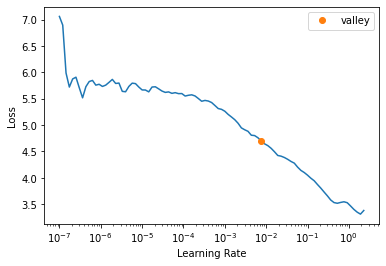

<Figure size 720x720 with 0 Axes>

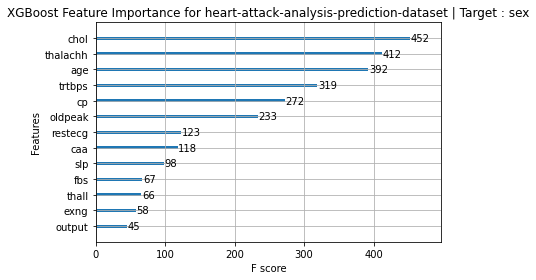

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

    feature  importance
0    output          51
1   oldpeak         218
2  thalachh         393
3       age         387
4       fbs          71


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

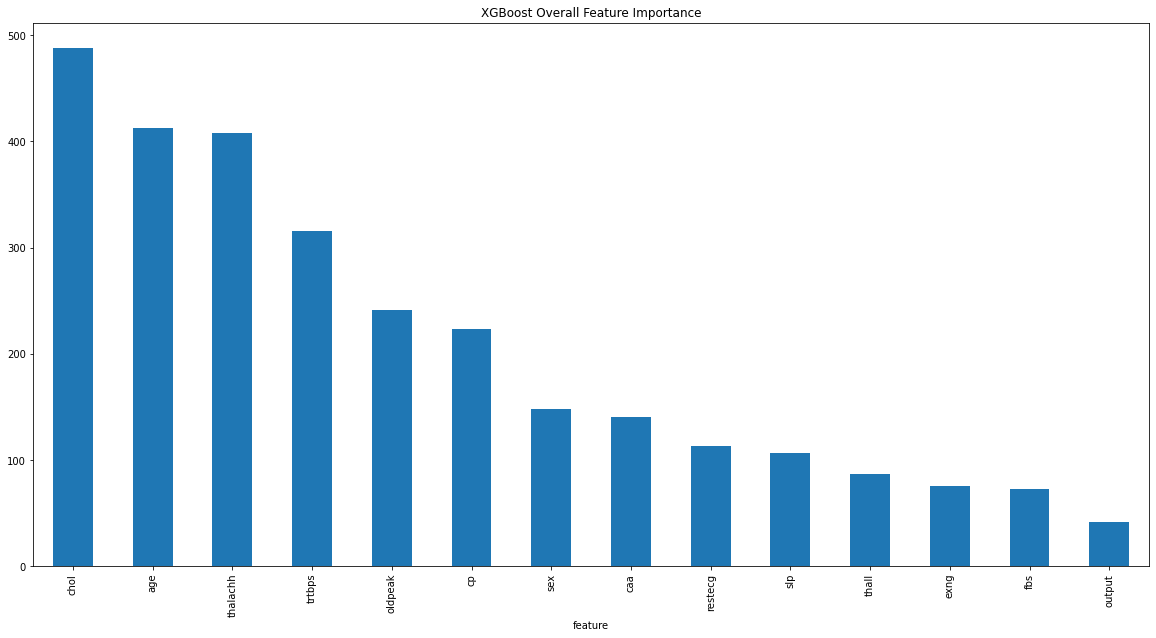

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# **To Be Continued...**